In [ ]:
# !pip install geopandas 

In [494]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import fiona
from datetime import datetime

![Wildfires](../../Data/Geo/fire-day.png)
[Source](https://www.google.com.hk/url?sa=i&url=https%3A%2F%2Fwww.craigdailypress.com%2Fnews%2Fnorthwest-colorado-fire-roundup-west-wild-cow-and-oil-springs%2F&psig=AOvVaw1IpwP-JVWV4x8ZQCVjud67&ust=1625155974521000&source=images&cd=vfe&ved=0CAsQjhxqFwoTCPjcnfffv_ECFQAAAAAdAAAAABAD)

# Introduction
Wildfires have increasingly become a major issue on earth during the last few years. These destructive natural disasters cause countless damage to the ecosystem as well as human infrastructures while disrupting the lives of many people. It is recorded that over 50% of the largest wildfires in California since 1932 occurred in the past decade (2010 - 2020), and 6 out of the 20 largest wildfires recorded in California happened in the year of 2020 alone [[1]](https://www.ca.gov/agency/?item=california-department-of-forestry-and-fire-protection). In fact, California is not the only place that suffered continuous damage and threats from the wildfires. The famous Australia bushfire disaster occurred during the new years eve of 2020 has destroyed almost two hundred thousand square kilometers, the second largest area burned by fire in the 21st century [[2]](https://en.wikipedia.org/wiki/2019–20_Australian_bushfire_season). It appears that these fires, although some maybe caused by human, become more and more frequent due to increasing human activities as well as the resulting global warming issue. In this project, my goal is to set up a scheme for predicting wildfires (excluding man-made fires since those are hard to predict) in future --- specifically in the state of California. Hopefully this project will serve as an insight to where are the potential hotspots for wildfires and find out the relationship between various climate/environmental factors (such as temperature, humidity, wind speed, plant types, etc) and wildfires.    



<table>
    <td>
        <figure>
            <img src='../../Data/Geo/aus_fire.jpg' width="1860">
            <figcaption>Australia Fire 2020</figcaption>
            <a href="https://www.google.com.hk/url?sa=i&url=https%3A%2F%2Fwww.nbcnews.com%2Fscience%2Fenvironment%2Fone-year-australia-s-devastating-wildfires-anger-grows-climate-change-n1256714&psig=AOvVaw00Lm5ZCn-pW8YYv6Lx2igO&ust=1625155259501000&source=images&cd=vfe&ved=0CAsQjhxqFwoTCLCSq6Ldv_ECFQAAAAAdAAAAABAD">source</a>
        </figure>
    </td>
    <td>
        <figure>
            <img src='../../Data/Geo/fire-night.webp'>
            <figcaption>Fires in California</figcaption>
            <a href="https://www.google.com.hk/url?sa=i&url=https%3A%2F%2Fwww.theguardian.com%2Fus-news%2F2020%2Fsep%2F22%2Fcalifornia-fires-los-angeles-us-west-coast-wildfires&psig=AOvVaw021xgO9knxNyYjlvd81gQF&ust=1625155393172000&source=images&cd=vfe&ved=0CAsQjhxqFwoTCIDP0-Pdv_ECFQAAAAAdAAAAABAD">source</a>
        </figure>
    </td>
</table>

# Research Question
What is the relationship between geographic locations, environment & weather data, and wildfires in California? Can we find out a way to predict future wildfires or locate wildfires hotspot based on those geographic data? Does the data indicate a worsening global warming issues, thus more frequent wildfires? These questions will help us understand which locations within California are likely to have wildfires. Additionally, answers to these questions will help us create better preventions and interventions in order to minimize the damage caused by wildfires as seen in recent years. 

#### Compare with research done by others:
Since wildfires are such a big problem in California and in the world, many studies have been done to make predictions about the next big wildfire. This type of studies/research may have been done in a much greater scale with more resources and professional helps in various institutions and agencies. What I can do in this research is to use statistical concepts and various visualizations to give a more straightforward look/understanding of the problem, without having to be a professional climate/weather expert myself. So my research will be mostly based on existing data and make predictions only using those data. Likely, my predictions/conclusions may not be able to match or compete with those created by professional teams, but hopefully this will serve as an intuition of the climate change/global warming issues.        


# Methods
### Data
- Wildfire history: `fire20_1.gdb` Fire Perimeters data from The California Department of Forestry and Fire Protection's Fire and Resource Assessment Program (FRAP) [[3]](https://frap.fire.ca.gov)
- Wildfire hazard zones: `HighHazardZones20_2.gdb` Fire Hazard Severity Zones (ADOPTED in 2007) from Office of the State Fire Marshal [[4]](https://www.arcgis.com/home/item.html?id=fc0ccb504be142b59eb16a7ef44669a3)
- Climate/Ecoregions: `calveg.gdb` CALVEG Zones from United States Department of Agriculture (USDA) [[5]](https://www.fs.usda.gov/detail/r5/landmanagement/resourcemanagement/?cid=stelprdb5347192)
- Vegetation: `ds1020.gdb` Vegetation Survey Points data from California Department of Fish and Wildlife (CDFW) [[6]](https://data.fs.usda.gov/geodata/edw/datasets.php)
- Landcover: `NationalLandcoverSections.gdb` Ecological Sections: Landcover data from United States Department of Agriculture (USDA) [[7]](https://data.cnra.ca.gov/dataset/4e2d81e7-ee01-4f91-b264-814efdea9c94)


### A preview of what the data looks like
Most of the datasets here come in the form of `geodatabase` or `gdb` <br>
`fiona` is a python library for reading data. It will allow us to load `gdb` files. 

<figure>
            <img src='../../Data/Geo/geodatabase-layers.png'>
            <center><figcaption><br>Layers in geodatabse</figcaption></center>
            <center><a href="https://www.google.com.hk/url?sa=i&url=https%3A%2F%2Fresources.arcgis.com%2Fen%2Fcommunities%2Fgeodata%2F017t0000000m000000.htm&psig=AOvVaw13cLSOkQTI-7ntoOTa4608&ust=1625155470922000&source=images&cd=vfe&ved=0CAsQjhxqFwoTCODuzIjev_ECFQAAAAAdAAAAABAV">source</a>
            </center>
</figure>

`Geodatabase` has layers and we can use `finoa` to list its layers

For example, the `fire20_1.gdb` dataset comes in three layers: `firep20_1`, `rxburn20_1`, and `Non_RXFire_Legacy13_2`:  

In [24]:
fiona.listlayers("../../Data/Geo/fire20_1.gdb")

['firep20_1', 'rxburn20_1', 'Non_RXFire_Legacy13_2']

### Methods:
Load geodatabase files for all data above. Use Fiona framework to list all the layers within the each geodatabase. Then, print the dataframe for each layer and display the result using geopandas. This will help visualize all the individual dataset nicely. 
Next, I will combine all the geodatabases by joining the corresponding dataframes, then create a new dataframes containing information such as climate, landcover, fire history, etc. I will also overlay each layer from each geodatabase (using matplotlib’s ax) and display different dataset together. 



***
# Wildfire History in California

## Preparation: Load California map

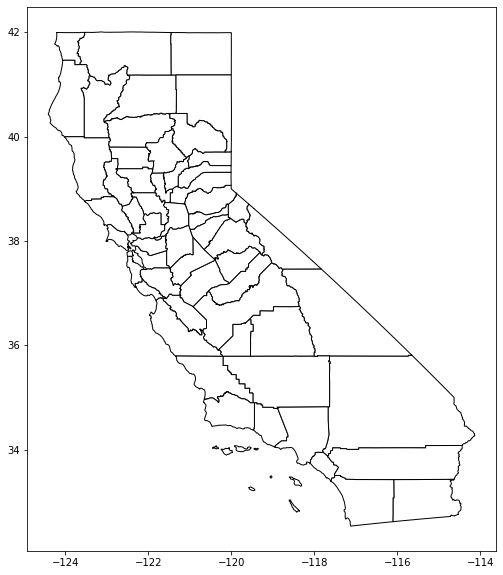

In [638]:
counties = gpd.read_file("zip://../../Data/Geo/cb_2018_us_county_5m.zip")
cal_counties = counties[counties["STATEFP"] == "06"]

# Plot California map with county boundaries
cal_counties.plot(color="white",
                edgecolor="black",
                figsize=(10,10)); 

In [515]:
# Wildfire history ================================================================================
fire_bound = gpd.read_file("../../Data/Geo/fire20_1.gdb", layer="firep20_1")
print(fire_bound.shape)

print(datetime.strptime(fire_bound["CONT_DATE"][0][:10], '%Y-%m-%d'))    

fire_bound.head()

(21318, 18)
2020-06-23 00:00:00


YEAR_ STATE AGENCY UNIT_ID FIRE_NAME   INC_NUM                 ALARM_DATE  \
0  2020    CA    CDF     NEU    NELSON  00013212  2020-06-18T00:00:00+00:00   
1  2020    CA    CDF     NEU   AMORUSO  00011799  2020-06-01T00:00:00+00:00   
2  2020    CA    CDF     NEU    ATHENS  00018493  2020-08-10T00:00:00+00:00   
3  2020    CA    CDF     NEU   FLEMING  00007619  2020-03-31T00:00:00+00:00   
4  2020    CA    CDF     NEU  MELANESE  00008471  2020-04-14T00:00:00+00:00   

                   CONT_DATE  CAUSE COMMENTS  REPORT_AC   GIS_ACRES  C_METHOD  \
0  2020-06-23T00:00:00+00:00   11.0               110.0  109.602501       1.0   
1  2020-06-04T00:00:00+00:00    2.0               670.0  685.585022       1.0   
2  2020-03-01T00:00:00+00:00   14.0                26.0   27.300480       1.0   
3  2020-04-01T00:00:00+00:00    9.0                13.0   12.931550       1.0   
4  2020-04-19T00:00:00+00:00   18.0                10.3   10.315960       1.0   

   OBJECTIVE FIRE_NUM  Shape_Length    Shape_Area  \
0        1.0     None   3252.523280  4.435447e+05   
1        1.0     None   9653.760308  2.774464e+06   
2        1.0     None   1649.643235  1.104811e+05   
3        1.0     None   1577.155857  5.233211e+04   
4        1.0     None   1035.787625  4.174722e+04   

                                            geometry  
0  MULTIPOLYGON (((-116841.251 97942.565, -116836...  
1  MULTIPOLYGON (((-117328.400 90212.407, -117321...  
2  MULTIPOLYGON (((-115605.059 92988.787, -115585...  
3  MULTIPOLYGON (((-110213.270 105975.579, -11020...  
4  MULTIPOLYGON (((-111793.600 164243.615, -11177...

In [516]:
# add a column: year_num 
fire_bound["YEAR_NUM"] = [int(x) if x is not None and x != '' else -1 for x in fire_bound["YEAR_"]]

# add a column: duration 
# use datetime to parse time string and subtract two datetime object to get the intervel times
fire_bound["DURATION"] = [(datetime.strptime(end[:10], '%Y-%m-%d') - 
                          datetime.strptime(start[:10], '%Y-%m-%d')).days
                          if end is not None and end != '' and start is not None and start != '' 
                          else None
                          for (end, start) in zip(fire_bound["CONT_DATE"], fire_bound["ALARM_DATE"])]
fire_bound.head()

YEAR_ STATE AGENCY UNIT_ID FIRE_NAME   INC_NUM                 ALARM_DATE  \
0  2020    CA    CDF     NEU    NELSON  00013212  2020-06-18T00:00:00+00:00   
1  2020    CA    CDF     NEU   AMORUSO  00011799  2020-06-01T00:00:00+00:00   
2  2020    CA    CDF     NEU    ATHENS  00018493  2020-08-10T00:00:00+00:00   
3  2020    CA    CDF     NEU   FLEMING  00007619  2020-03-31T00:00:00+00:00   
4  2020    CA    CDF     NEU  MELANESE  00008471  2020-04-14T00:00:00+00:00   

                   CONT_DATE  CAUSE COMMENTS  REPORT_AC   GIS_ACRES  C_METHOD  \
0  2020-06-23T00:00:00+00:00   11.0               110.0  109.602501       1.0   
1  2020-06-04T00:00:00+00:00    2.0               670.0  685.585022       1.0   
2  2020-03-01T00:00:00+00:00   14.0                26.0   27.300480       1.0   
3  2020-04-01T00:00:00+00:00    9.0                13.0   12.931550       1.0   
4  2020-04-19T00:00:00+00:00   18.0                10.3   10.315960       1.0   

   OBJECTIVE FIRE_NUM  Shape_Length    Shape_Area  \
0        1.0     None   3252.523280  4.435447e+05   
1        1.0     None   9653.760308  2.774464e+06   
2        1.0     None   1649.643235  1.104811e+05   
3        1.0     None   1577.155857  5.233211e+04   
4        1.0     None   1035.787625  4.174722e+04   

                                            geometry  YEAR_NUM  DURATION  
0  MULTIPOLYGON (((-116841.251 97942.565, -116836...      2020       5.0  
1  MULTIPOLYGON (((-117328.400 90212.407, -117321...      2020       3.0  
2  MULTIPOLYGON (((-115605.059 92988.787, -115585...      2020    -162.0  
3  MULTIPOLYGON (((-110213.270 105975.579, -11020...      2020       1.0  
4  MULTIPOLYGON (((-111793.600 164243.615, -11177...      2020       5.0

In [517]:
# sort dataframe by largest fires 
fire_bound_sorted_by_area = fire_bound.sort_values(by=['REPORT_AC'], ascending=False)
fire_bound_sorted_by_area.head(10)

YEAR_ STATE AGENCY UNIT_ID      FIRE_NAME   INC_NUM  \
10693  2002    CA    USF     PNF        BISCUIT  00000000   
20845  2018    CA    CDF     LNU          RANCH  00008646   
247    2020    CA    USF     SNF          CREEK  00001391   
242    2020    CA    USF     PNF  NORTH COMPLEX  00001302   
17880  2012    CA    BLM     NOD           RUSH  00003490   
225    2020    CA    CDF     LNU      HENNESSEY  00013337   
20427  2017    CA    USF     VNC         THOMAS  00003583   
15678  2003    CA    USF     CNF          CEDAR  00000000   
13063  1993    CA    CCO     VNC        STECKEL  00000000   
18227  2013    CA    USF     STF            RIM  00000006   

                      ALARM_DATE                  CONT_DATE  CAUSE  \
10693  2002-07-13T00:00:00+00:00  2002-11-08T00:00:00+00:00    1.0   
20845  2018-07-27T00:00:00+00:00  2018-09-19T00:00:00+00:00   14.0   
247    2020-09-04T00:00:00+00:00  2020-12-24T00:00:00+00:00   14.0   
242    2020-08-17T00:00:00+00:00  2020-12-03T00:00:00+00:00    1.0   
17880  2012-08-12T00:00:00+00:00  2012-10-22T00:00:00+00:00    1.0   
225    2020-08-17T00:00:00+00:00  2020-09-16T00:00:00+00:00    1.0   
20427  2017-12-04T00:00:00+00:00  2018-01-12T00:00:00+00:00    9.0   
15678  2003-10-25T00:00:00+00:00  2003-11-05T00:00:00+00:00    2.0   
13063  1993-10-27T00:00:00+00:00                       None   14.0   
18227  2013-08-17T00:00:00+00:00  2013-10-24T00:00:00+00:00    4.0   

                                      COMMENTS  REPORT_AC      GIS_ACRES  \
10693                                            499945.0  501082.031250   
20845                        MENDOCINO_COMPLEX   410203.0  410202.468750   
247       33CBB9DC-6983-4F47-B821-9C9A6CAC381D   379895.0  379882.250000   
242       76D31198-0DB2-4ED3-8A95-85F24964E547   318776.0  318776.687500   
17880                                            315577.0  315511.500000   
225          Part of the LNU LIGHTNING COMPLEX   305651.0  305351.593750   
20427               CONT_DATE based on Inciweb   281893.0  281790.875000   
15678                                            280278.0  270686.000000   
13063                                            265000.0   27084.615234   
18227  2013-CAYNP-0126 Suppressed Human Caused   255858.0  256175.531250   

       C_METHOD  OBJECTIVE  FIRE_NUM   Shape_Length    Shape_Area  \
10693       8.0        1.0  00000003  403257.735458  2.027807e+09   
20845       7.0        1.0      None  348227.665079  1.660030e+09   
247         8.0        1.0      None  818087.845138  1.537168e+09   
242         1.0        1.0      None  395836.529097  1.290127e+09   
17880       3.0        1.0      None  414346.362960  1.276830e+09   
225         7.0        1.0      None  787304.943024  1.235715e+09   
20427       7.0        1.0      None  445282.444798  1.140367e+09   
15678       8.0        1.0  00000087  362038.176056  1.095427e+09   
13063       NaN        1.0  00000000   62175.585912  1.096075e+08   
18227       7.0        1.0            340544.183491  1.036706e+09   

                                                geometry  YEAR_NUM  DURATION  
10693  MULTIPOLYGON (((-312204.325 515977.299, -31205...      2002     118.0  
20845  MULTIPOLYGON (((-234360.174 117822.945, -23437...      2018      54.0  
247    MULTIPOLYGON (((72664.223 -101975.956, 72660.1...      2020     111.0  
242    MULTIPOLYGON (((-105656.515 169602.836, -10566...      2020     108.0  
17880  MULTIPOLYGON (((7076.719 322986.461, 7099.969 ...      2012      71.0  
225    MULTIPOLYGON (((-202091.983 89446.928, -202076...      2020      30.0  
20427  MULTIPOLYGON (((34867.386 -396856.457, 34819.3...      2017      39.0  
15678  MULTIPOLYGON (((297580.235 -571822.494, 297557...      2003      11.0  
13063  MULTIPOLYGON (((69797.297 -401232.777, 69764.9...      1993       NaN  
18227  MULTIPOLYGON (((9894.657 3520.062, 9875.712 35...      2013      68.0

In [352]:
fire_bound_sorted_by_durations = fire_bound.sort_values(by=['DURATION'], ascending=False)
fire_bound_sorted_by_durations.head()

YEAR_ STATE AGENCY UNIT_ID FIRE_NAME   INC_NUM  \
18945  1990    CA    NPS     YNP     PIUTE  00000086   
623    2007    CA    USF     TNF   RALSTON  00001443   
18840  2006    CA    NPS     SMP  WESTLAKE  0000CW9F   
20664  2018    CA    CDF     SHU    GORGE   00008796   
13149  2012    CA    CCO     KRN     LAVAL  01216604   

                      ALARM_DATE                  CONT_DATE  CAUSE  \
18945  1990-08-13T00:00:00+00:00  1999-09-14T00:00:00+00:00    1.0   
623    2006-09-05T00:00:00+00:00  2007-09-17T00:00:00+00:00    9.0   
18840  2006-07-08T00:00:00+00:00  2007-07-09T00:00:00+00:00    2.0   
20664  2018-08-19T00:00:00+00:00  2019-08-19T00:00:00+00:00   14.0   
13149  2012-06-03T00:00:00+00:00  2013-06-03T00:00:00+00:00   14.0   

            COMMENTS    REPORT_AC    GIS_ACRES  C_METHOD  OBJECTIVE  FIRE_NUM  \
18945                  552.470484   552.472717       4.0        1.0  00000086   
623                   8422.000000  8421.043945       2.0        1.0  00000064   
18840  Westlake Fire    30.000000    33.915497       2.0        1.0  00000524   
20664           None   155.000000   154.562424       2.0        1.0      None   
13149           None    41.000000    41.165211       1.0        1.0      None   

       Shape_Length    Shape_Area  \
18945  10464.029584  2.235778e+06   
623    45005.699672  3.407876e+07   
18840   2388.512651  1.372512e+05   
20664   3715.129539  6.254919e+05   
13149   2058.151152  1.665897e+05   

                                                geometry  YEAR_NUM  DURATION  
18945  MULTIPOLYGON (((34492.572 -6705.398, 34437.024...      1990    3319.0  
623    MULTIPOLYGON (((-54215.661 115453.546, -54156....      2007     377.0  
18840  MULTIPOLYGON (((110627.863 -429788.296, 110627...      2006     366.0  
20664  MULTIPOLYGON (((-242200.118 262920.988, -24217...      2018     365.0  
13149  MULTIPOLYGON (((99011.767 -336479.142, 99007.3...      2012     365.0

## Only keep large wildfires (which burnt area > 50000.0 acres)

In [526]:
large_fires = fire_bound.loc[fire_bound['REPORT_AC'] > 50000.0]
large_fires.sort_values(by=['YEAR_NUM'], ascending=False, inplace=True)
print(large_fires.shape)
large_fires.head(100)

<ipython-input-526-7fe4480bc1eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_fires.sort_values(by=['YEAR_NUM'], ascending=False, inplace=True)


(75, 20)


YEAR_ STATE AGENCY UNIT_ID              FIRE_NAME   INC_NUM  \
21     2020    CA    CDF     CZU  CZU LIGHTNING COMPLEX  00005205   
119    2020    CA    CDF     SHU                   ZOGG  00009978   
200    2020    CA    USF     ANF                 BOBCAT  00003687   
225    2020    CA    CDF     LNU              HENNESSEY  00013337   
239    2020    CA    USF     LPF                  DOLAN  00002428   
...     ...   ...    ...     ...                    ...       ...   
10626  1970    CA    USF     CNF                 LAGUNA  00000000   
10639  1970    CA    USF     BDF                   BEAR  00000000   
15638  1953    CA    USF     ANF              FISH FORK  00000000   
18532  1926    CA    NPS     KNP                 KAWEAH  00000000   
16185  1919    CA    USF     ANF                RAVENNA  00000000   

                      ALARM_DATE                  CONT_DATE  CAUSE  \
21     2020-08-16T00:00:00+00:00  2020-09-24T00:00:00+00:00    1.0   
119    2020-09-27T00:00:00+00:00  2020-10-13T00:00:00+00:00   14.0   
200    2020-09-06T00:00:00+00:00  2020-10-19T00:00:00+00:00   14.0   
225    2020-08-17T00:00:00+00:00  2020-09-16T00:00:00+00:00    1.0   
239    2020-08-18T00:00:00+00:00  2020-12-31T00:00:00+00:00   14.0   
...                          ...                        ...    ...   
10626  1970-09-26T00:00:00+00:00  1970-09-26T00:00:00+00:00    4.0   
10639  1970-11-11T00:00:00+00:00  1970-11-19T00:00:00+00:00    4.0   
15638  1953-09-09T00:00:00+00:00                       None   14.0   
18532  1926-08-10T00:00:00+00:00  1926-08-19T00:00:00+00:00    7.0   
16185  1919-09-18T00:00:00+00:00                       None   14.0   

                                                COMMENTS  REPORT_AC  \
21                                                  None    86509.0   
119                                                 None    56338.0   
200                 56C3E0AE-98EF-4433-863D-23A5DFF3D0C2   115796.0   
225                    Part of the LNU LIGHTNING COMPLEX   305651.0   
239                 F0A60F88-D1D5-4D86-8105-A3A06456B357   124924.0   
...                                                  ...        ...   
10626                                                      174158.0   
10639                                                       53100.0   
15638  S.Imsand; Baldy, Fish Fork San Gabriel River, ...   214500.0   
18532                                                       86000.0   
16185  S.Imsand,Tujunga,3,4N 13,14,15W, StaClaraDivAr...    65000.0   

           GIS_ACRES  C_METHOD  OBJECTIVE  FIRE_NUM   Shape_Length  \
21      86553.460938       7.0        1.0      None  203187.734726   
119     56338.050781       3.0        1.0      None  144997.567969   
200    115997.976562       7.0        1.0      None  357359.302473   
225    305351.593750       7.0        1.0      None  787304.943024   
239    124527.312500       7.0        1.0      None  206053.551567   
...              ...       ...        ...       ...            ...   
10626  174161.546875       8.0        1.0  00000046  241974.352438   
10639   51655.246094       8.0        1.0  00000241  106940.738417   
15638   24609.814453       NaN        1.0  00000000   80194.746589   
18532   34357.703125       6.0        1.0  00000001   80754.142162   
16185     576.987976       NaN        1.0  00000000    7853.251485   

         Shape_Area                                           geometry  \
21     3.502694e+08  MULTIPOLYGON (((-189043.273 -107748.836, -1890...   
119    2.279920e+08  MULTIPOLYGON (((-220178.461 264709.155, -22021...   
200    4.694272e+08  MULTIPOLYGON (((177089.189 -418181.228, 177090...   
225    1.235715e+09  MULTIPOLYGON (((-202091.983 89446.928, -202076...   
239    5.039444e+08  MULTIPOLYGON (((-118974.902 -224976.708, -1189...   
...             ...                                                ...   
10626  7.048068e+08  MULTIPOLYGON (((303053.884 -570246.525, 303337...   
10639  2.090414e+08  MULTIPOLYGON (((275629.758 -4

## A histogram of fires based on size of the areas 
### *only includes large fires (>50000 acres)

array([[<AxesSubplot:title={'center':'REPORT_AC'}>]], dtype=object)

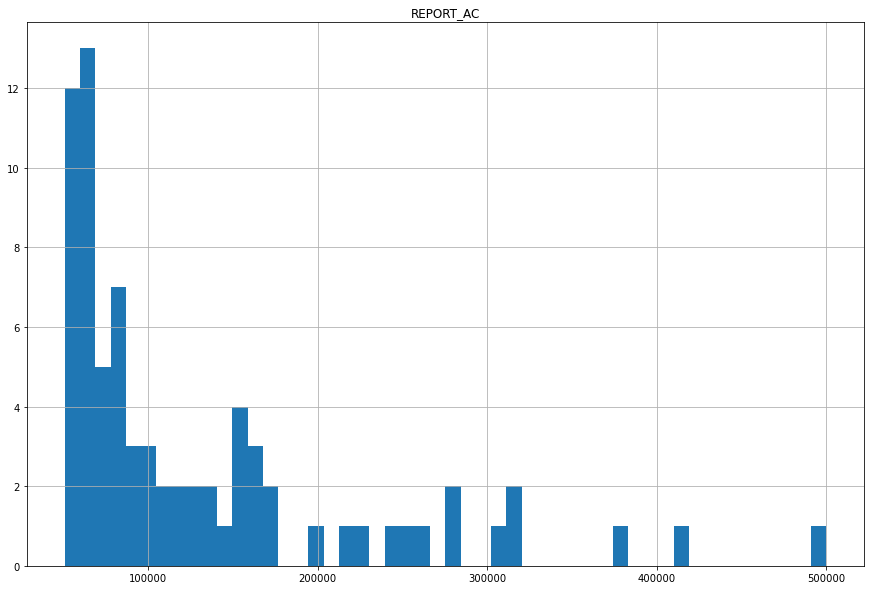

In [597]:
large_fires.hist(column="REPORT_AC", bins=50, figsize=(15, 10))

## A bar plot of large fires (area > 50000 Acres)

<ipython-input-599-d1e0ec8ce34f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  largefire_by_area.sort_values(by=['REPORT_AC'], ascending=False, inplace=True)


(75, 20)


<AxesSubplot:ylabel='FIRE_NAME'>

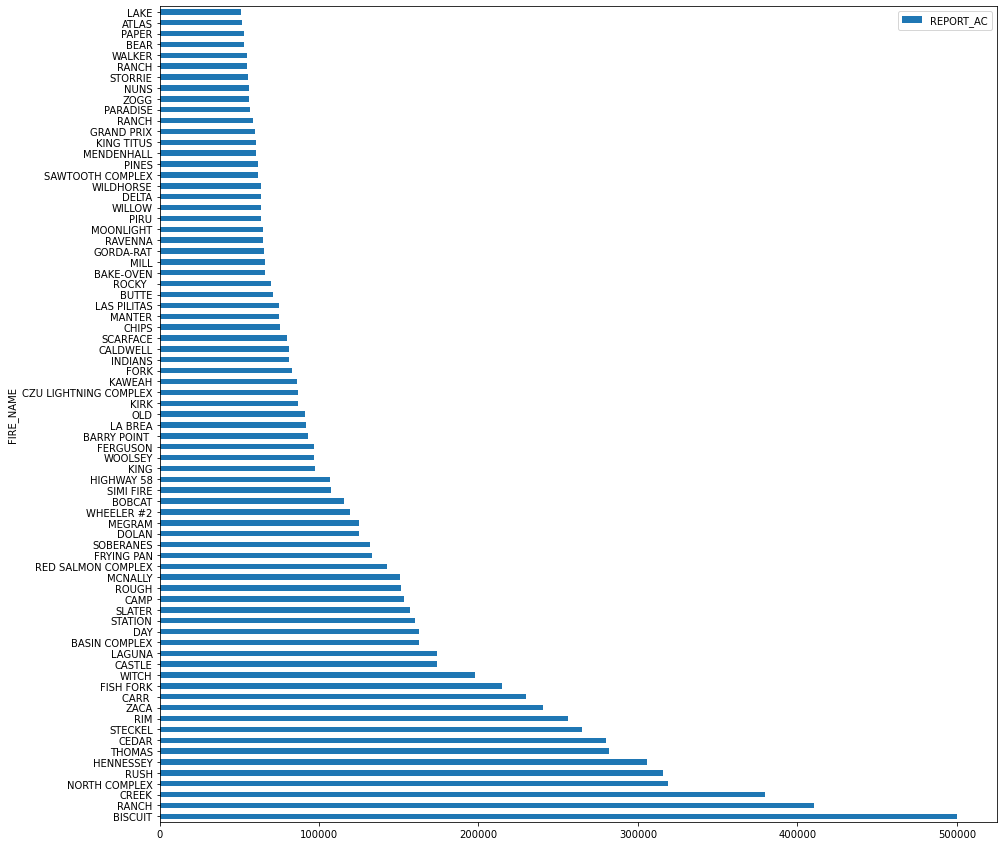

In [599]:
largefire_by_area = fire_bound.loc[fire_bound['REPORT_AC'] > 50000.0]
largefire_by_area.sort_values(by=['REPORT_AC'], ascending=False, inplace=True)
print(largefire_by_area.shape)
largefire_by_area.plot.barh(x="FIRE_NAME", y="REPORT_AC",figsize=(15, 15))

## A scatterplot of fires since 1919 

<AxesSubplot:xlabel='YEAR_NUM', ylabel='REPORT_AC'>

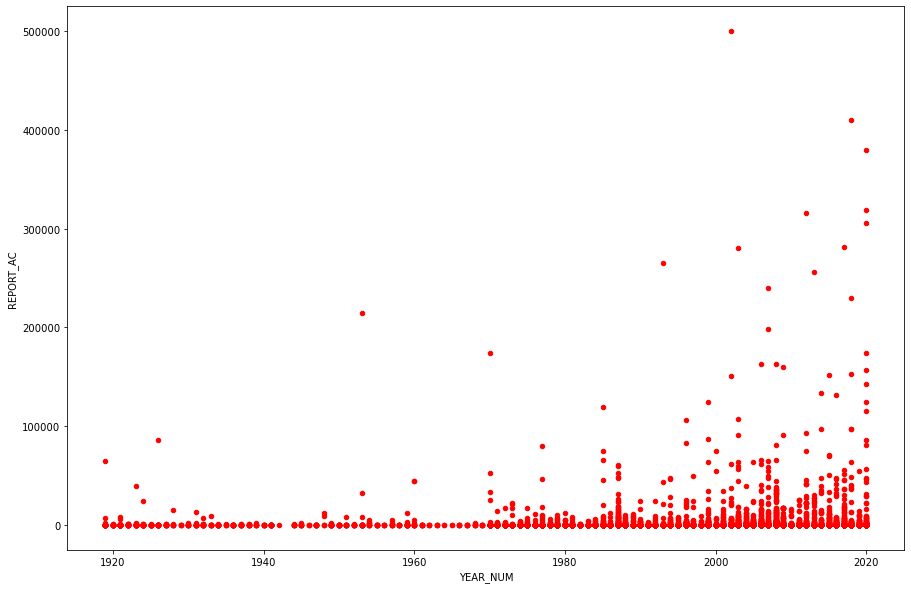

In [616]:
fire_bound_last_century = fire_bound.loc[fire_bound['YEAR_NUM'] >= 1919]
fire_bound_last_century.plot.scatter(x="YEAR_NUM", y="REPORT_AC", s=20, c="red", figsize=(15, 10))

## A scatterplot of large fires (> 1000 acres) since 1919 

<AxesSubplot:xlabel='YEAR_NUM', ylabel='REPORT_AC'>

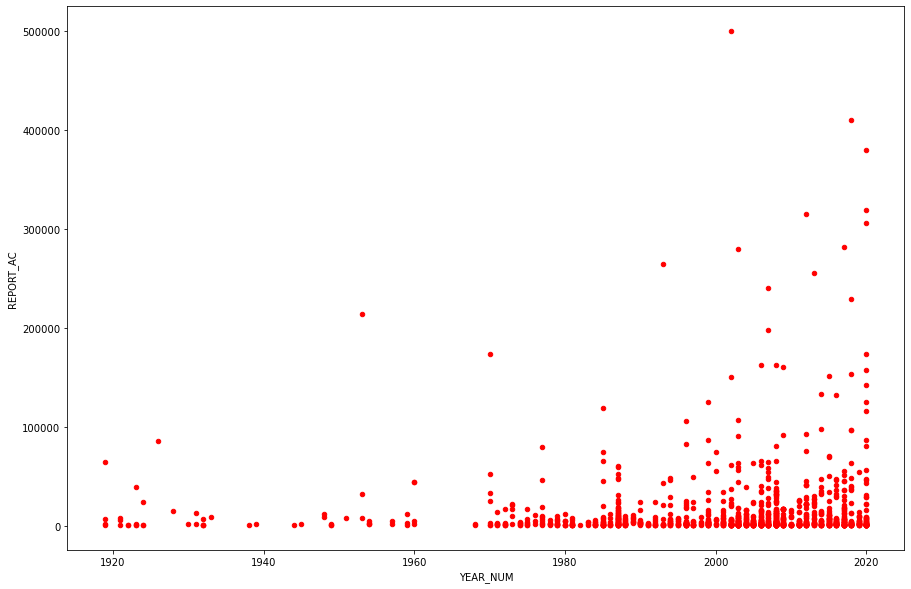

In [615]:
large_fires2 = fire_bound_last_century.loc[fire_bound['REPORT_AC'] > 1000.0]
large_fires2.plot.scatter(x="YEAR_NUM", y="REPORT_AC", s=20, c="red", figsize=(15, 10))

## A scatterplot of large fires after 1920 and their durations 

<AxesSubplot:xlabel='YEAR_NUM', ylabel='DURATION'>

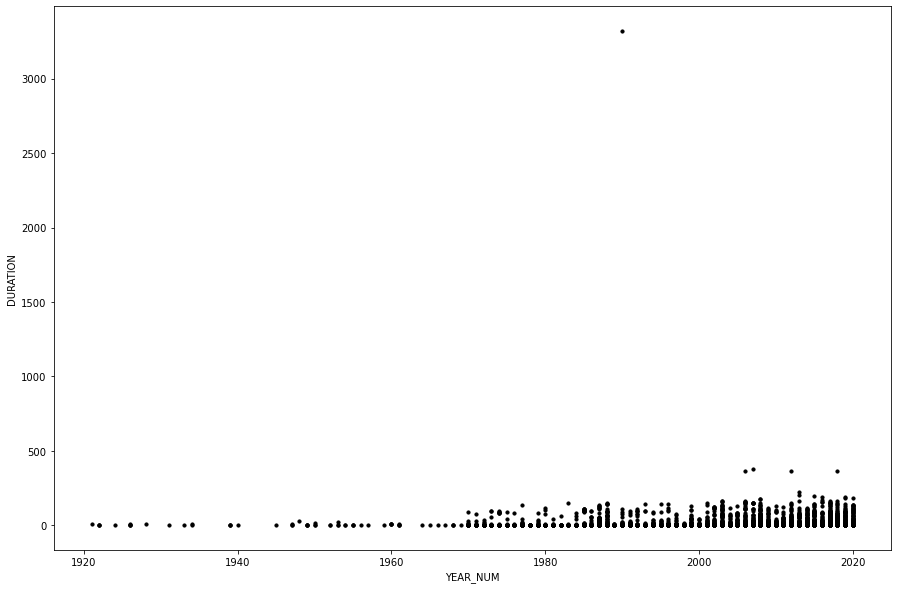

In [613]:
fire_durations = fire_bound_last_century.loc[fire_bound['DURATION'] >= 2]
fire_durations.plot.scatter(x="YEAR_NUM", y="DURATION", s=10, c="black", figsize=(15, 10))

In [605]:
fire_bound_sorted_by_durations.head(3)

YEAR_ STATE AGENCY UNIT_ID FIRE_NAME   INC_NUM  \
18945  1990    CA    NPS     YNP     PIUTE  00000086   
623    2007    CA    USF     TNF   RALSTON  00001443   
18840  2006    CA    NPS     SMP  WESTLAKE  0000CW9F   

                      ALARM_DATE                  CONT_DATE  CAUSE  \
18945  1990-08-13T00:00:00+00:00  1999-09-14T00:00:00+00:00    1.0   
623    2006-09-05T00:00:00+00:00  2007-09-17T00:00:00+00:00    9.0   
18840  2006-07-08T00:00:00+00:00  2007-07-09T00:00:00+00:00    2.0   

            COMMENTS    REPORT_AC    GIS_ACRES  C_METHOD  OBJECTIVE  FIRE_NUM  \
18945                  552.470484   552.472717       4.0        1.0  00000086   
623                   8422.000000  8421.043945       2.0        1.0  00000064   
18840  Westlake Fire    30.000000    33.915497       2.0        1.0  00000524   

       Shape_Length    Shape_Area  \
18945  10464.029584  2.235778e+06   
623    45005.699672  3.407876e+07   
18840   2388.512651  1.372512e+05   

                                                geometry  YEAR_NUM  DURATION  
18945  MULTIPOLYGON (((34492.572 -6705.398, 34437.024...      1990    3319.0  
623    MULTIPOLYGON (((-54215.661 115453.546, -54156....      2007     377.0  
18840  MULTIPOLYGON (((110627.863 -429788.296, 110627...      2006     366.0

### Remove errors in data 

(3625, 20)


<AxesSubplot:xlabel='YEAR_NUM', ylabel='DURATION'>

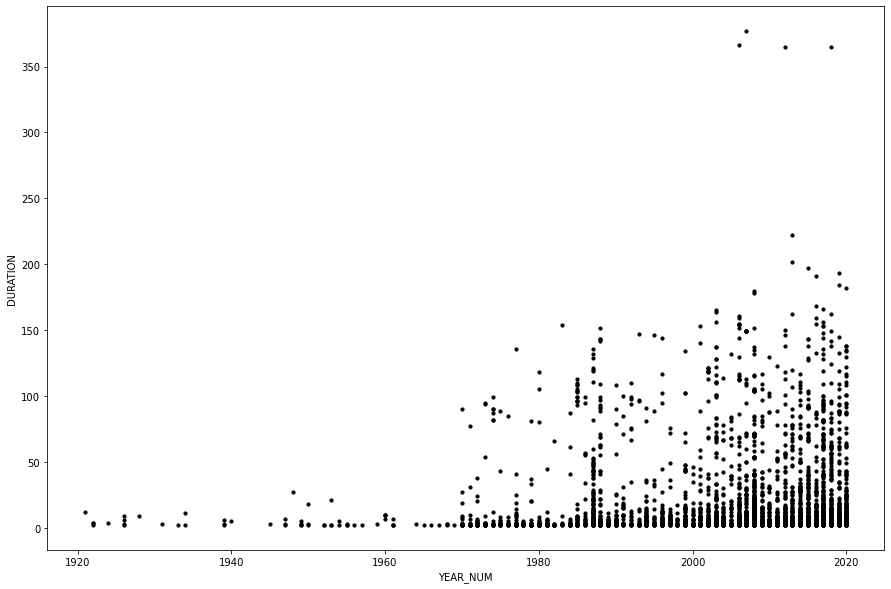

In [612]:
# remove outliers 
fire_durations2 = fire_durations.loc[fire_bound['DURATION'] < 1000]
print(fire_durations2.shape)
fire_durations2.plot.scatter(x="YEAR_NUM", y="DURATION", s=10, c="black", figsize=(15, 10))

### Calculate average duration of fires for each decade to see if fires are getting longer to contain   

In [580]:
decade_sum = {"1920s":0,"1930s":0,"1940s":0,"1950s":0,"1960s":0,
              "1970s":0,"1980s":0,"1990s":0,"2000s":0,"2010s":0}

decade_count = {"1920s":0,"1930s":0,"1940s":0,"1950s":0,"1960s":0,
              "1970s":0,"1980s":0,"1990s":0,"2000s":0,"2010s":0}

# group by decades 
for i, row in fire_durations2.iterrows():
    decade_sum[str(row["YEAR_NUM"] - 1)[:-1] + "0s"] += row["DURATION"]
    decade_count[str(row["YEAR_NUM"] - 1)[:-1] + "0s"] += 1
    

#### Sum of duration of all fires for each decade: 

In [581]:
decade_sum

{'1920s': 55.0,
 '1930s': 34.0,
 '1940s': 77.0,
 '1950s': 87.0,
 '1960s': 214.0,
 '1970s': 2441.0,
 '1980s': 8291.0,
 '1990s': 5529.0,
 '2000s': 24102.0,
 '2010s': 35657.0}

#### Number of fires for each decade: 

In [582]:
decade_count

{'1920s': 10,
 '1930s': 8,
 '1940s': 12,
 '1950s': 17,
 '1960s': 27,
 '1970s': 190,
 '1980s': 394,
 '1990s': 354,
 '2000s': 1115,
 '2010s': 1498}

In [583]:
decade_avg = {"1920s":0,"1930s":0,"1940s":0,"1950s":0,"1960s":0,
              "1970s":0,"1980s":0,"1990s":0,"2000s":0,"2010s":0}

# average will be sum / num of fires
for decade in ["1920s","1930s","1940s","1950s","1960s","1970s","1980s","1990s","2000s","2010s"]:
    decade_avg[decade] = decade_sum[decade] / decade_count[decade]
    
decade_avg    

{'1920s': 5.5,
 '1930s': 4.25,
 '1940s': 6.416666666666667,
 '1950s': 5.117647058823529,
 '1960s': 7.925925925925926,
 '1970s': 12.847368421052632,
 '1980s': 21.043147208121827,
 '1990s': 15.61864406779661,
 '2000s': 21.616143497757847,
 '2010s': 23.803070761014688}

In [584]:
# turn dictionary into dataframe
average_duration_each_decade = pd.DataFrame.from_dict(decade_avg, orient='index', columns=["Average_duration"])
average_duration_each_decade

Average_duration
1920s          5.500000
1930s          4.250000
1940s          6.416667
1950s          5.117647
1960s          7.925926
1970s         12.847368
1980s         21.043147
1990s         15.618644
2000s         21.616143
2010s         23.803071

Text(0, 0.5, 'Avg Durations in Days')

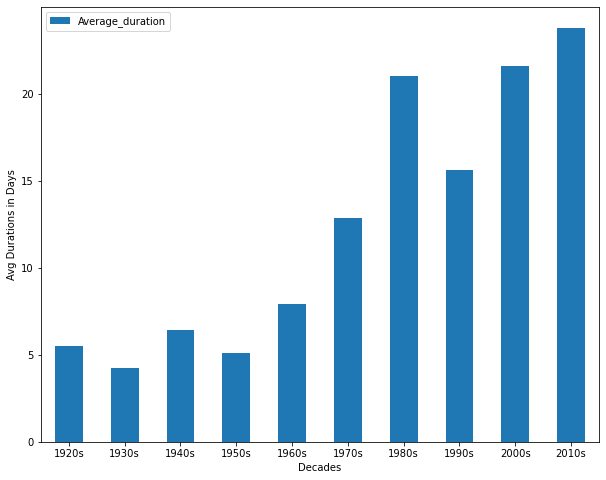

In [631]:
average_duration_each_decade.plot.bar(figsize=(10,8))
plt.xticks(rotation='horizontal')
plt.xlabel('Decades')
plt.ylabel('Avg Durations in Days')

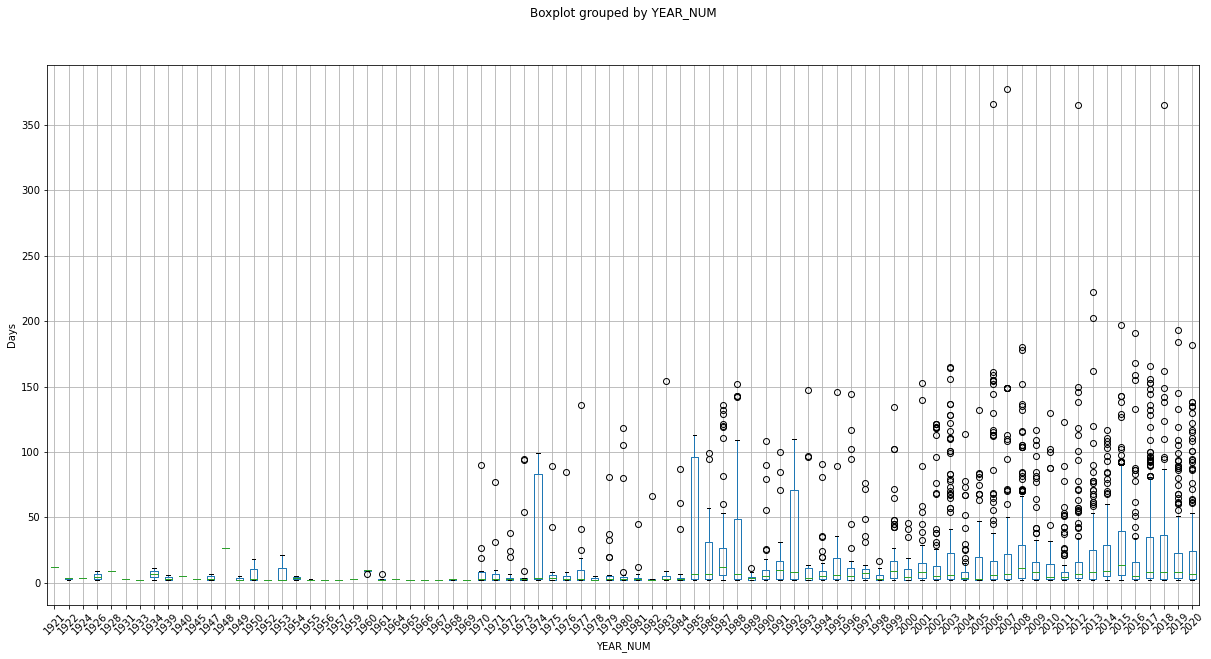

In [633]:
fire_durations2.boxplot(column=["DURATION"], 
                       by="YEAR_NUM", 
                       figsize=(20, 10))
plt.xticks(rotation=45)
plt.ylabel('Days')
plt.title("");

### There are too many small fires!
> Let's only look at fires that lasted longer than 10 days

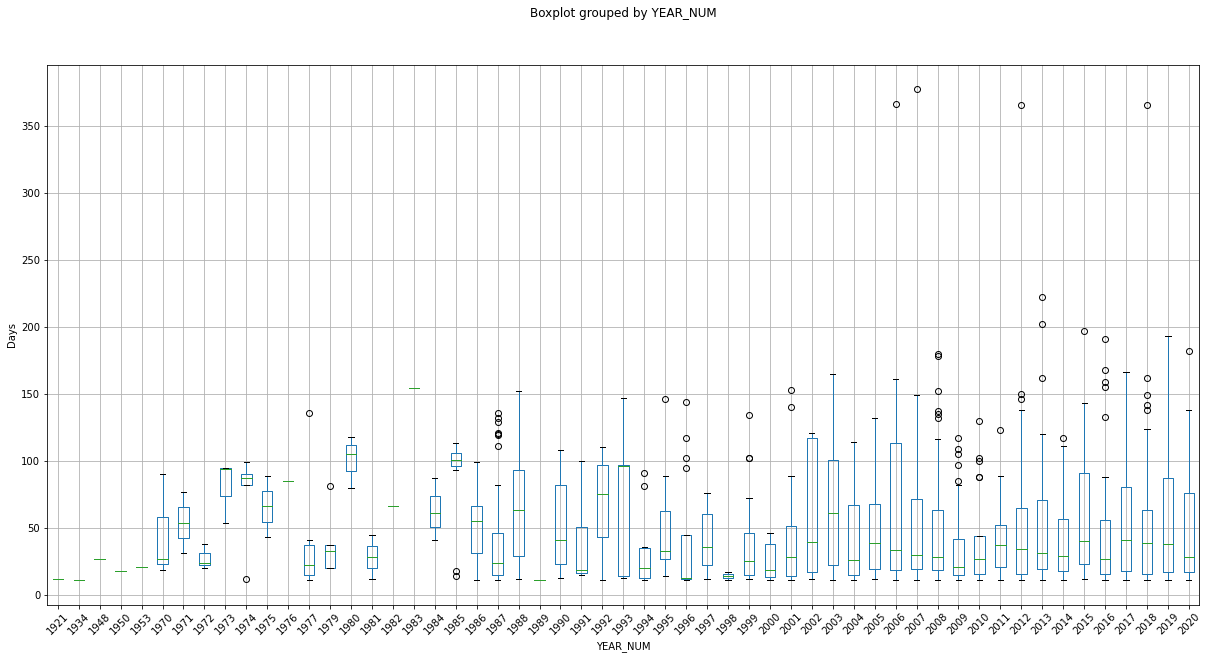

In [634]:
fire_durations_longer = fire_durations2[fire_durations2["DURATION"] > 10]
fire_durations_longer.boxplot(column=["DURATION"], 
                              by="YEAR_NUM", 
                              figsize=(20, 10))
plt.xticks(rotation=45)
plt.ylabel('Days')
plt.title("");

## visualizing fires on map  

<AxesSubplot:>

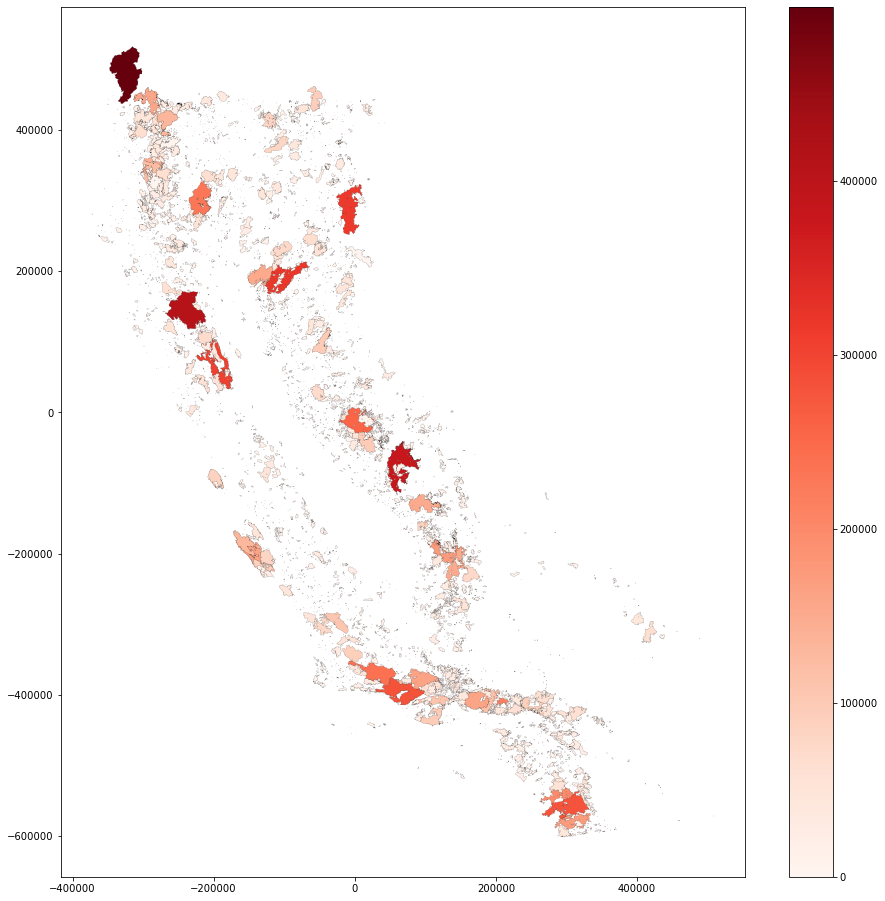

In [621]:
fire_bound = gpd.read_file("../../Data/Geo/fire20_1.gdb", layer="firep20_1")

fire_bound = fire_bound.loc[fire_bound["YEAR_"] > '1700']

fire_bound.plot(column="REPORT_AC",
                cmap="Reds",
                edgecolor = "black", 
                linewidth = 0.1, 
                legend=True,
                figsize = (16,16))


## overlaying with California map

<AxesSubplot:>

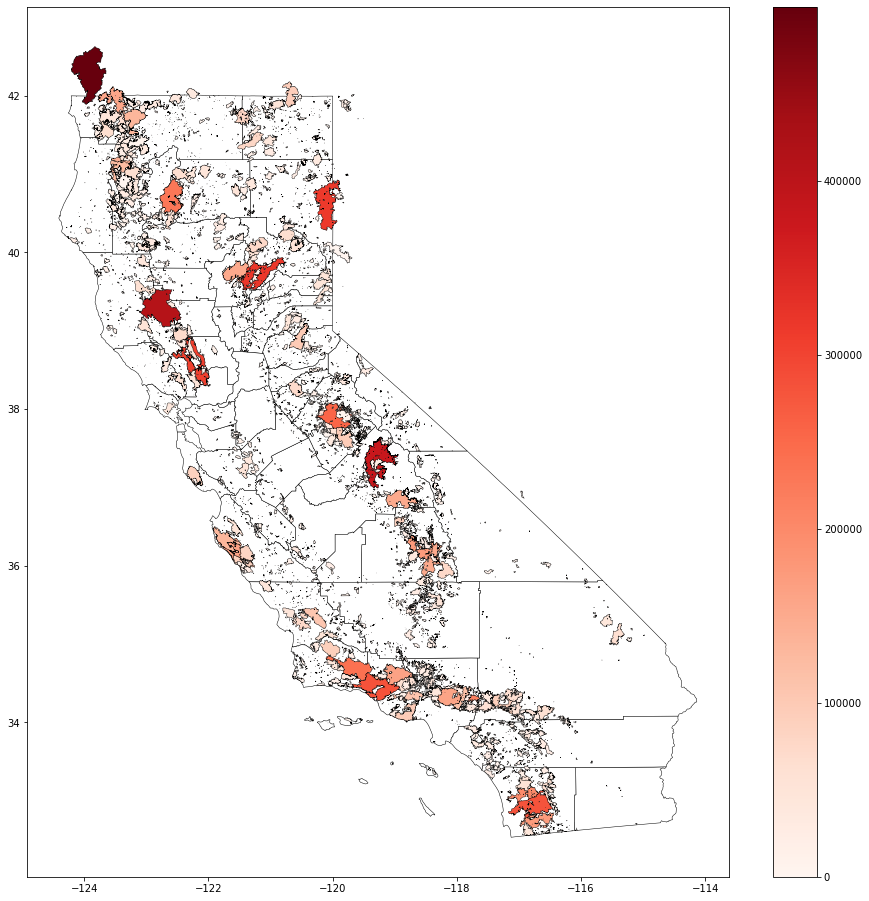

In [669]:
base = cal_counties.plot(color='white', 
                    edgecolor='black', 
                    linewidth=0.5,
                    figsize=(16,16))

fire_bound = fire_bound.to_crs(cal_counties.crs)

fire_bound.plot(ax=base,
                column="REPORT_AC",
                cmap="Reds",
                edgecolor = "black", 
                linewidth = 0.4, 
                legend=True)

## zoom in and look at Bay Area

/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

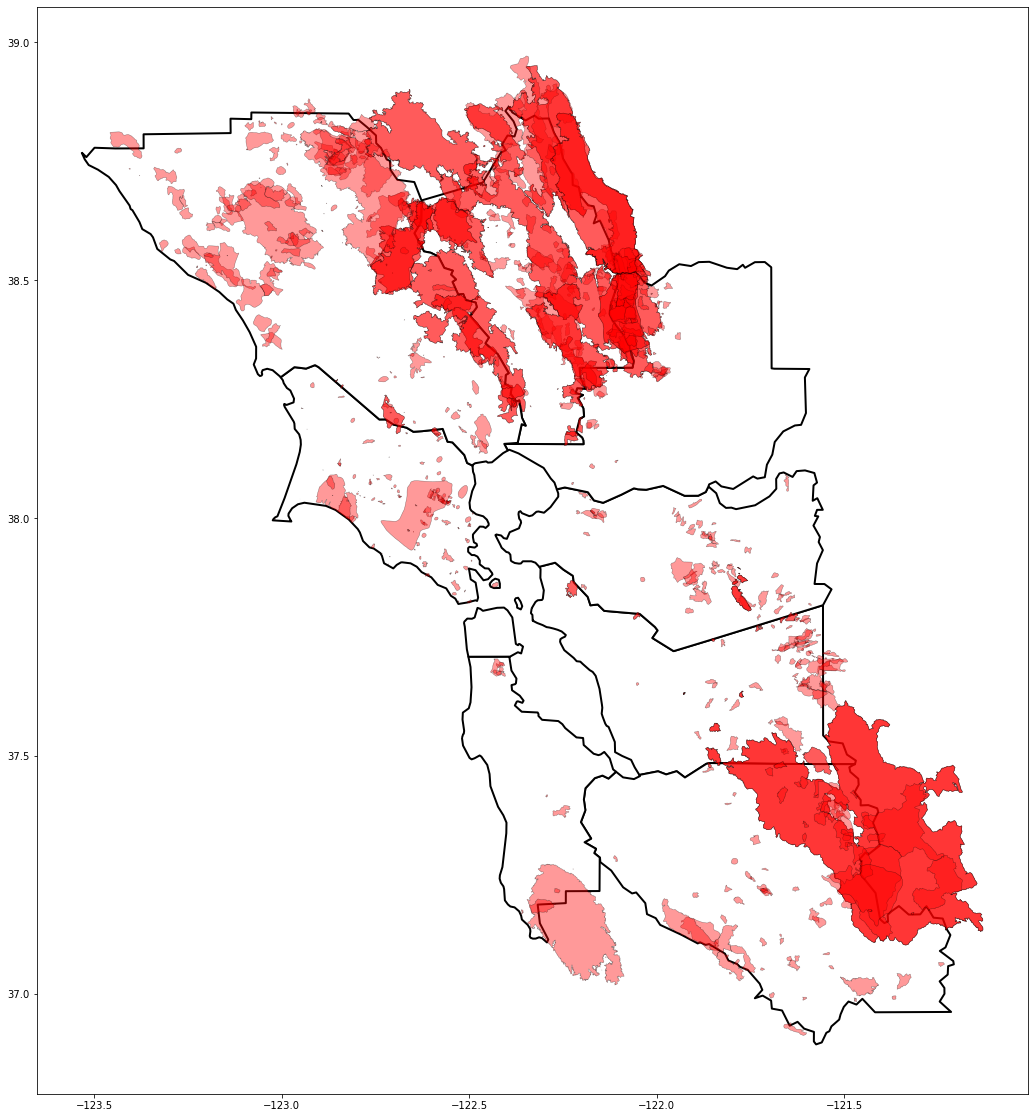

In [380]:
# only look at bayarea 
bayarea = cal_counties.loc[ (cal_counties.COUNTYFP == '075') | 
                            (cal_counties.COUNTYFP == '081') | 
                            (cal_counties.COUNTYFP == '085') | 
                            (cal_counties.COUNTYFP == '001') |
                            (cal_counties.COUNTYFP == '013') |
                            (cal_counties.COUNTYFP == '095') |
                            (cal_counties.COUNTYFP == '055') |
                            (cal_counties.COUNTYFP == '097') | 
                            (cal_counties.COUNTYFP == '041') ]

# sjoining bayarea dataframe and the fire bound dataframe
bayarea_fire_history = gpd.sjoin(fire_bound, bayarea, how="inner", op='intersects')


base = bayarea.plot(color='white', 
                    edgecolor='black', 
                    linewidth=2,
                    figsize=(20,20));

bayarea_fire_history = bayarea_fire_history.to_crs(bayarea.crs)

bayarea_fire_history.plot(ax=base,
                column="REPORT_AC",
                color="red",
                alpha = 0.4,
                edgecolor = "black", 
                linewidth = 0.5,
                legend=True)


## only look at fires that were caused by power lines

![CAUSE code meaning](../../Data/Geo/cause.png)

<AxesSubplot:>

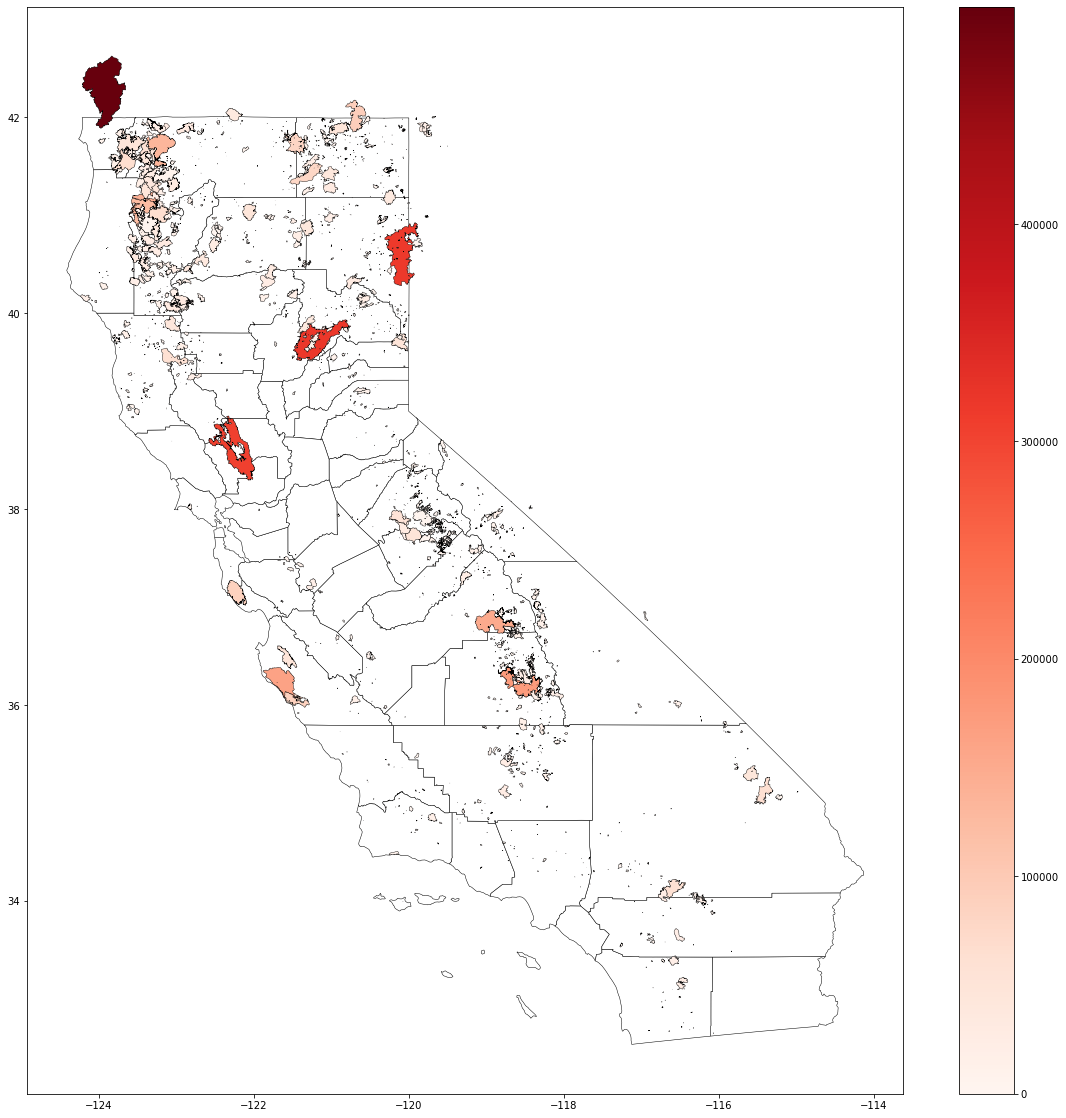

In [670]:
# only look at fires that were caused by power lines
fire_bound_caused_by_lightning = fire_bound.loc[fire_bound["CAUSE"] == 1]


base = cal_counties.plot(color='white', 
                    edgecolor='black', 
                    linewidth=0.5,
                    figsize=(20,20))

fire_bound_caused_by_lightning = fire_bound_caused_by_lightning.to_crs(cal_counties.crs)

fire_bound_caused_by_lightning.plot(ax=base,
                                    column="REPORT_AC",
                                    cmap="Reds",
                                    edgecolor = "black", 
                                    linewidth = 0.4, 
                                    legend=True)

## Wildfire hazard zone in California  

In [153]:
fiona.listlayers("../../Data/Geo/HighHazardZones20_2.gdb")


['Tier1_HighHazardZones20_1', 'Tier2_HighHazardZones20_2']

In [639]:
# Wildfire hazard zones ================================================================================
hazard_zones = gpd.read_file("../../Data/Geo/HighHazardZones20_2.gdb", layer="Tier1_HighHazardZones20_1")

# there is only one type in this: Tier 1


print(hazard_zones.shape)
hazard_zones.head()

(152655, 6)


Acres    Type YearDesignated  Shape_Length     Shape_Area  \
0  44.091563  Tier 1           2020   4526.837924  178432.211239   
1   0.002937  Tier 1           2020     19.044418      11.884636   
2   4.557993  Tier 1           2020   1257.882658   18445.533826   
3   5.536944  Tier 1           2020    733.221696   22281.119350   
4   1.507314  Tier 1           2020    372.614583    6099.879756   

                                            geometry  
0  MULTIPOLYGON (((-166511.435 -178605.327, -1665...  
1  MULTIPOLYGON (((-98827.924 -219954.830, -98830...  
2  MULTIPOLYGON (((-140821.310 -216137.652, -1407...  
3  MULTIPOLYGON (((-132594.881 -226285.734, -1325...  
4  MULTIPOLYGON (((-162101.477 -193646.859, -1620...

<AxesSubplot:>

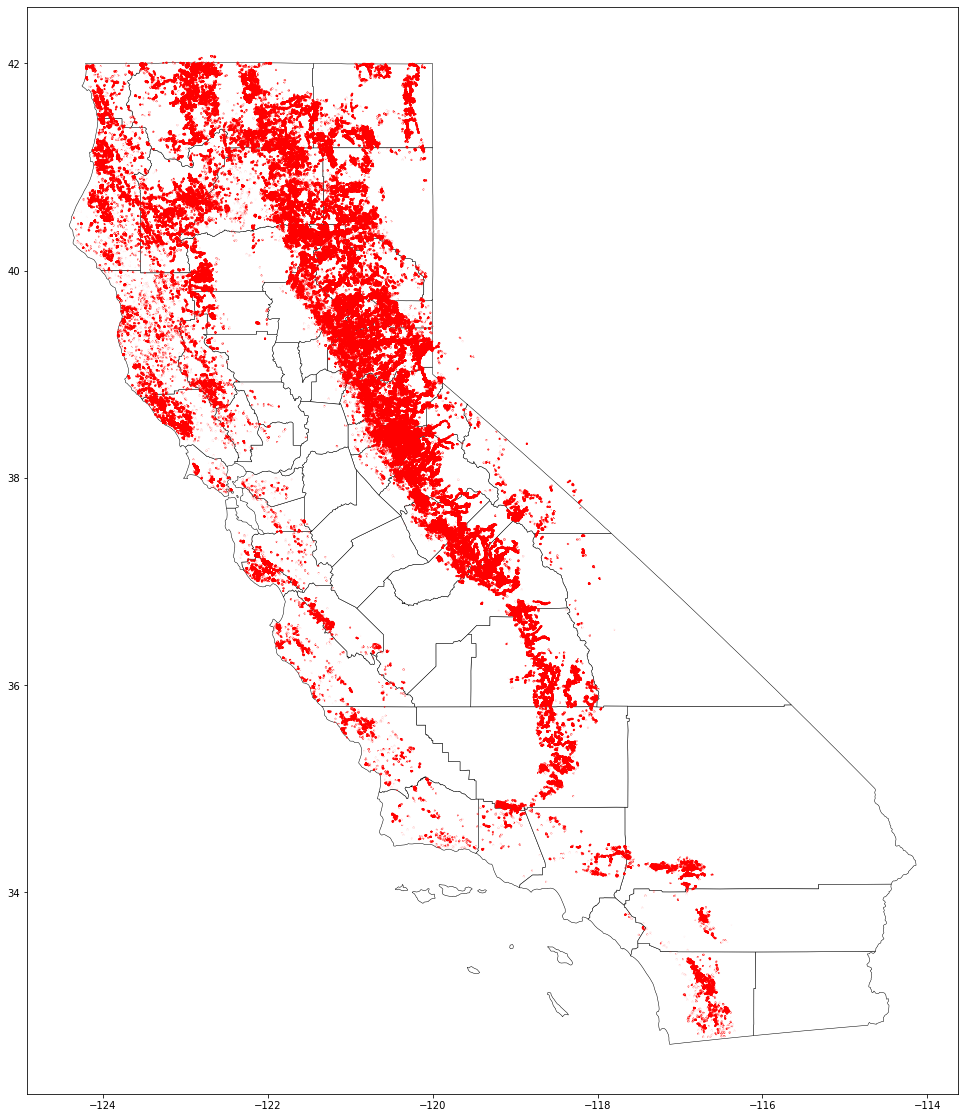

In [172]:
base = cal_counties.plot(color='white', 
                    edgecolor='black', 
                    linewidth=0.5,
                    figsize=(20,20))

hazard_zones = hazard_zones.to_crs(cal_counties.crs)

hazard_zones.plot(ax=base,
                  color = "red",
                  edgecolor = "red", 
                  linewidth = 2, 
                  legend=True)

<AxesSubplot:>

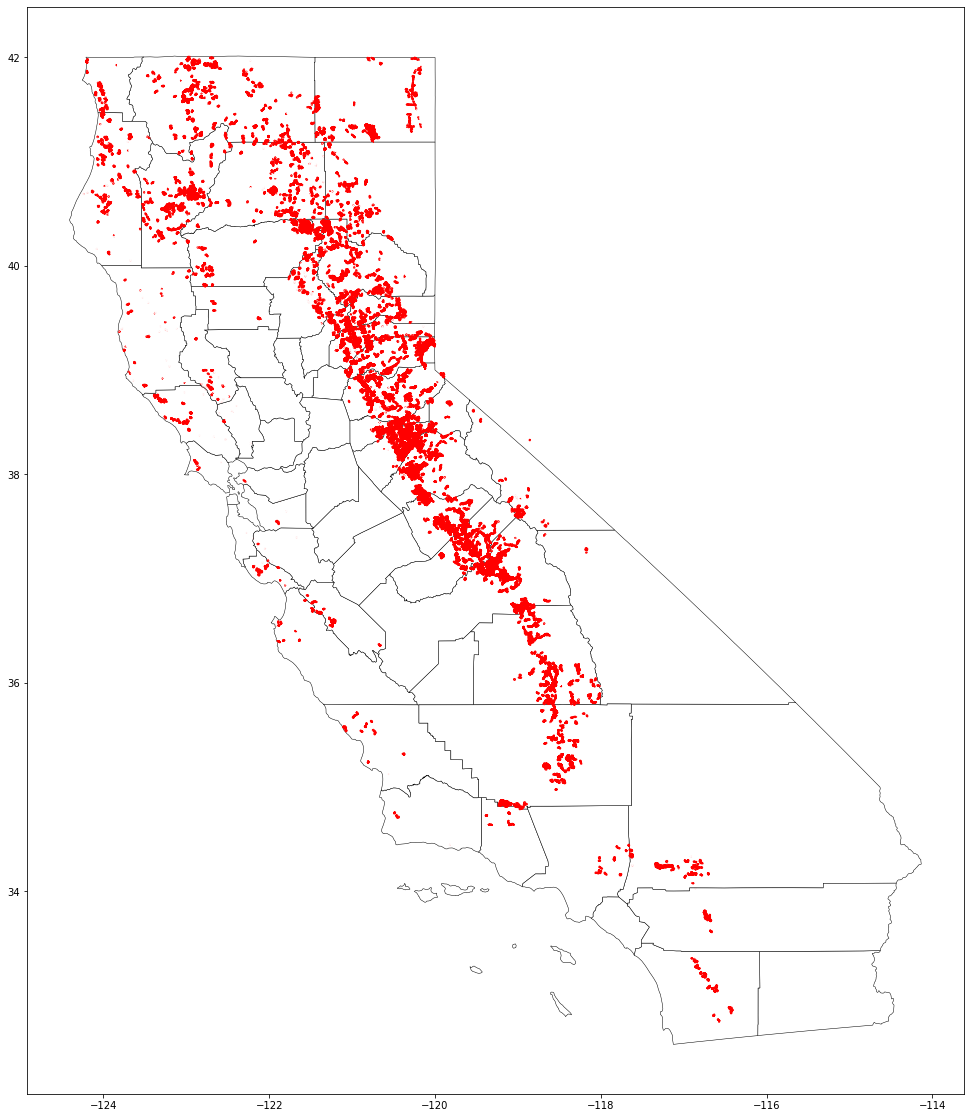

In [168]:
hazard_zones_smaller = hazard_zones.loc[hazard_zones["Acres"] > 100.0]
base = cal_counties.plot(color='white', 
                    edgecolor='black', 
                    linewidth=0.5,
                    figsize=(20,20))

hazard_zones_smaller = hazard_zones_smaller.to_crs(cal_counties.crs)

hazard_zones_smaller.plot(ax=base,
                          color = "red",
                          edgecolor = "red", 
                          linewidth = 2, 
                          legend=True)

## Areas that could be affected by fires (Tier Two High Hazard Zones for Tree Mortality dataset)

In [640]:
hazard_zones2 = gpd.read_file("../../Data/Geo/HighHazardZones20_2.gdb", layer="Tier2_HighHazardZones20_2")
print(hazard_zones2.shape)
hazard_zones2.head()

(5145, 14)


Type  Date DesignationMethod                            WatershedName  \
0  Watrshed  2016            Office  Little Pico Creek-Frontal Pacific Ocean   
1  Watrshed  2016            Office                  Lower San Antonio Creek   
2  Watrshed  2017            Office                              Hames Creek   
3  Watrshed  2017            Office       Sam Jones Canyon-San Antonio River   
4  Watrshed  2017            Office       Meadow Creek-Frontal Pacific Ocean   

  WatershedNumber        HydroRegion FireName IncidentNumber         Acres  \
0    180600060407  CentralSouthCoast                          74405.742867   
1    180600090105  CentralSouthCoast                          24622.453719   
2    180600050803  CentralSouthCoast                          28729.252726   
3    180600050707  CentralSouthCoast                          29324.485102   
4    180600060705  CentralSouthCoast                          61972.046936   

   FHSZ4NUM FHSZ4   Shape_Length    Shape_Area  \
0       NaN  None  144373.039806  1.045753e+08   
1       NaN  None   55781.417274  9.964197e+07   
2       NaN  None   65569.795864  1.162632e+08   
3       NaN  None   73379.559799  1.186720e+08   
4       NaN  None  160379.988010  1.045615e+08   

                                            geometry  
0  MULTIPOLYGON (((-119327.955 -249957.986, -1192...  
1  MULTIPOLYGON (((-45149.396 -354183.456, -45073...  
2  MULTIPOLYGON (((-89042.295 -226408.628, -89038...  
3  MULTIPOLYGON (((-102532.036 -223391.595, -1025...  
4  MULTIPOLYGON (((-68703.030 -312596.690, -68686...

<AxesSubplot:>

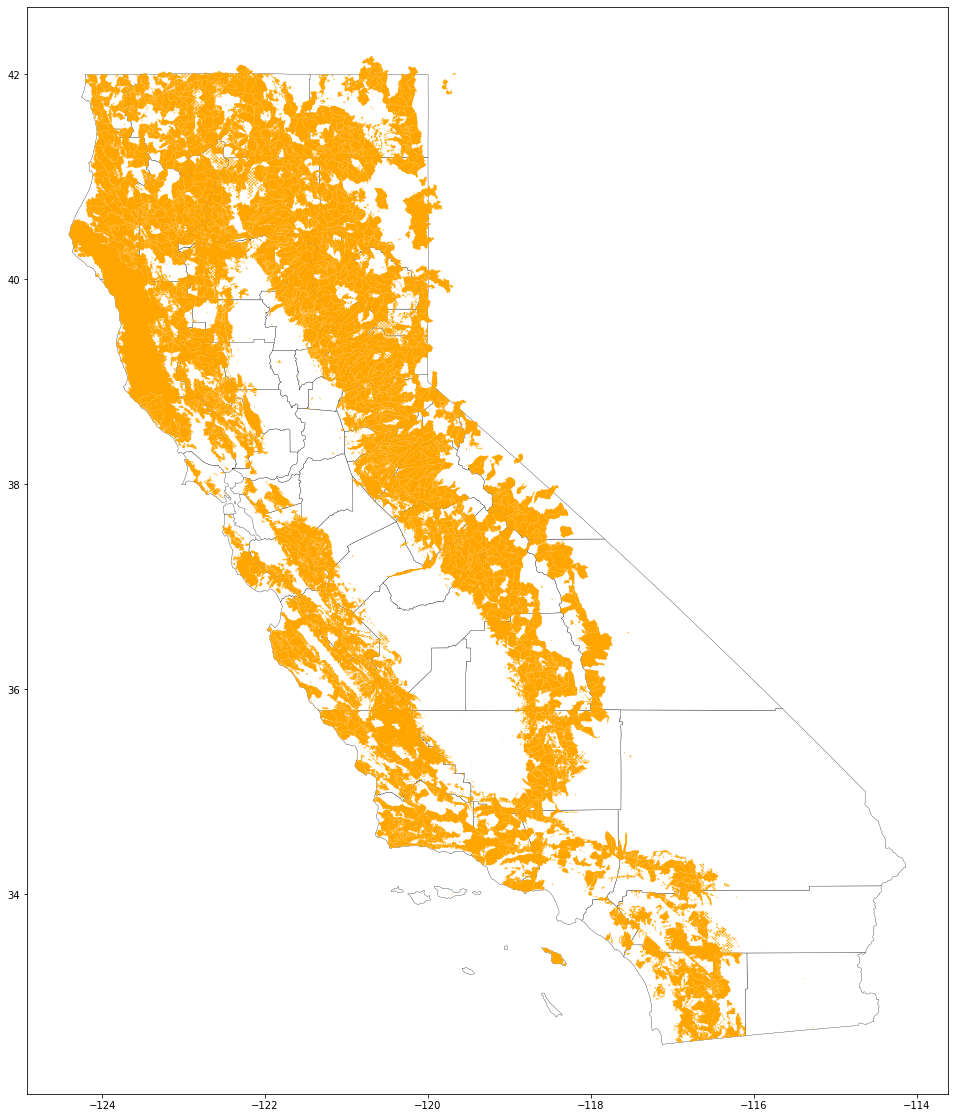

In [671]:
base = cal_counties.plot(color='white', 
                    edgecolor='black', 
                    linewidth=0.3,
                    figsize=(20,20))

hazard_zones2 = hazard_zones2.to_crs(cal_counties.crs)

hazard_zones2.plot(color="orange",
                   ax=base,
                   legend=True)

In [41]:
fiona.listlayers("../../Data/Geo/calveg.gdb")

['EV_CalvegZones_Ecoregions']

In [693]:
# climate (ecoregions) ================================================================================
calveg = gpd.read_file("../../Data/Geo/calveg.gdb", layer="EV_CalvegZones_Ecoregions")
print(calveg.shape)
calveg.head()
# set(calveg["ECOREGION_SECTION"].tolist())
set(calveg["ECOREGION_PROVINCE"].tolist())
# ECOREGION_DIVISION
# ECOREGION_DOMAIN

(340, 10)


{'261', '262', '263', '322', '341', '342', 'M242', 'M261', 'M262'}

<AxesSubplot:>

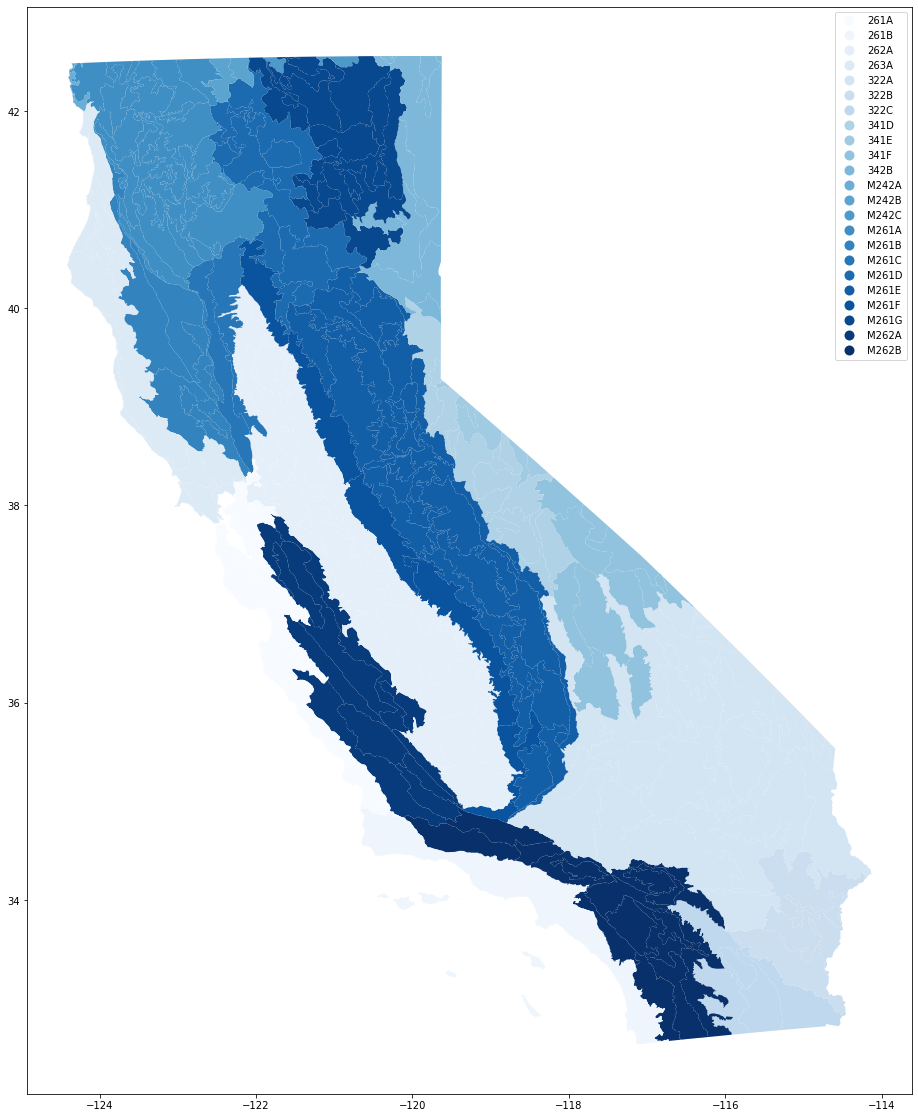

In [180]:
calveg.plot(column = "ECOREGION_SECTION", 
            cmap = "Blues", 
            linewidth = 1, 
            legend=True,
            figsize = (20,20))

![Ecoregions](../../Data/Geo/ecoregions.png)

<AxesSubplot:>

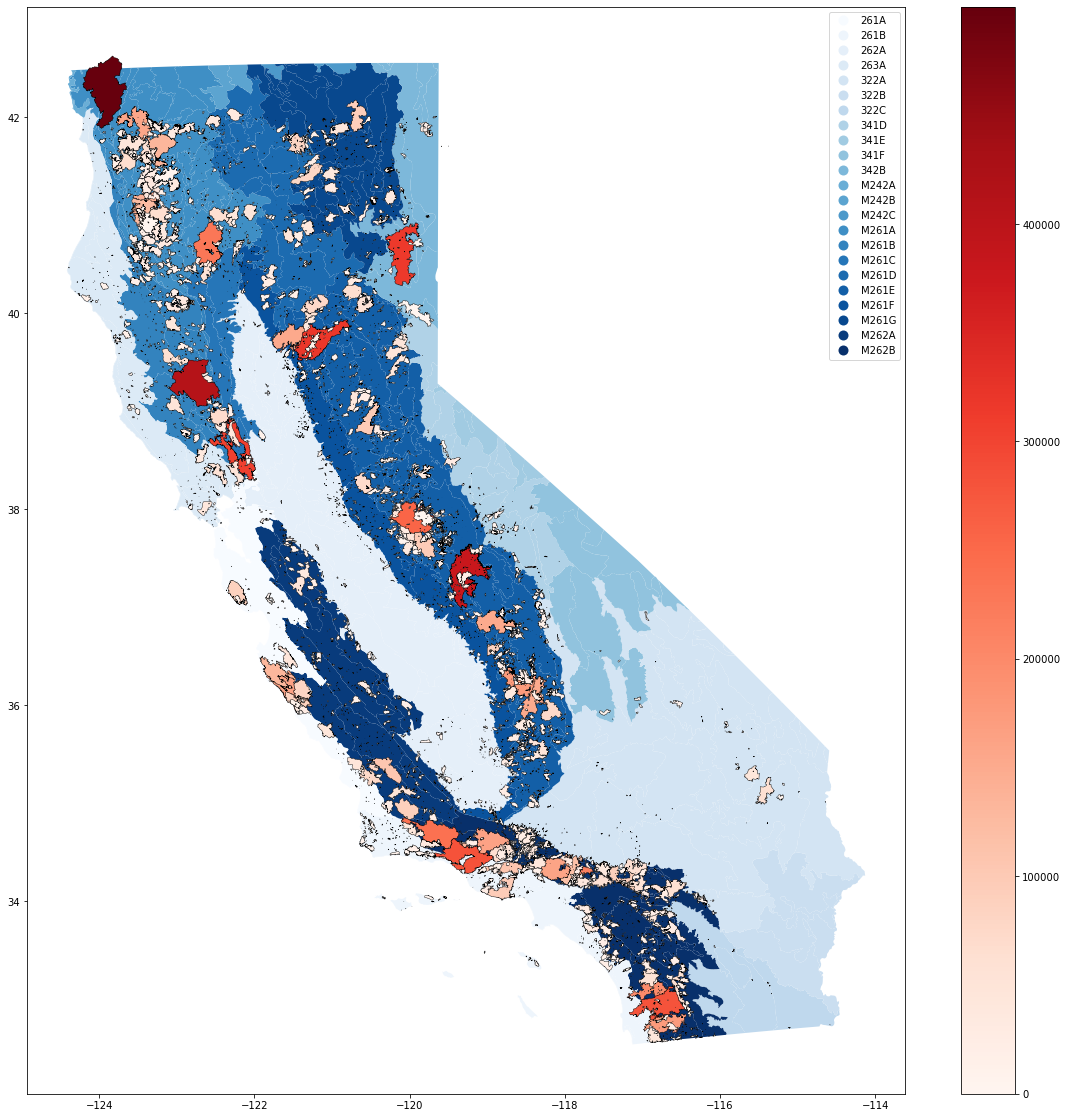

In [182]:
# overlapping firebounds and ecoregions 
base = calveg.plot(column = "ECOREGION_SECTION", 
            cmap = "Blues", 
            linewidth = 1, 
            legend=True,
            figsize = (20,20))

fire_bound = fire_bound.to_crs(calveg.crs)

fire_bound.plot(ax=base,
                column="REPORT_AC",
                cmap="Reds",
                edgecolor = "black", 
                linewidth = 0.4, 
                legend=True)

## Landcover data 

In [183]:
fiona.listlayers("../../Data/Geo/Landcover.gdb")

['NationalLandcoverSections']

In [653]:
# Landcover ================================================================================
landcover = gpd.read_file("../../Data/Geo/Landcover.gdb", layer="NationalLandcoverSections")
print(landcover.shape)

# print(landcover["MAP_UNIT_DESCRIPTION"].tolist())
landcover.head()

(191, 60)


MAP_TYPE MAP_LEVEL   PROJECT MAP_UNIT_SYMBOL  \
0     ECUN      SECT  ECOMAP07            223F   
1     ECUN      SECT  ECOMAP07           M331G   
2     ECUN      SECT  ECOMAP07            331B   
3     ECUN      SECT  ECOMAP07            251E   
4     ECUN      SECT  ECOMAP07            313D   

                    MAP_UNIT_NAME  \
0  Interior Low Plateau-Bluegrass   
1         South Central Highlands   
2            Southern High Plains   
3                    Osage Plains   
4                  Painted Desert   

                                MAP_UNIT_DESCRIPTION  \
0  This subregion is a moderately dissected plate...   
1  This section has steeply sloping, sharp-creste...   
2  This subregion is a high plateau with flat ter...   
3  This subregion is characterized by low, parall...   
4  This section consists of extensive plateaus wi...   

   BARE_ROCK_SAND_CLAY_ACRES  BARE_ROCK_SAND_CLAY_PCT  \
0                        4.0                     0.00   
1                   209107.0                     2.74   
2                     9750.0                     0.06   
3                     1473.0                     0.01   
4                   173438.0                     1.94   

   COMMERC_INDUST_TRANS_ACRES  COMMERC_INDUST_TRANS_PCT  ...  SECTION_  \
0                     79460.0                      1.01  ...       128   
1                      3192.0                      0.04  ...       129   
2                     21731.0                      0.14  ...       130   
3                     61034.0                      0.57  ...       131   
4                     10560.0                      0.12  ...       132   

   SECTION_ID  S_USA_NationalLandcoverSections_AREA     PERIMETER  \
0         128                                  None  1.429145e+06   
1         129                                  None  1.576245e+06   
2         130                                  None  2.096744e+06   
3         131                                  None  1.838575e+06   
4         132                                  None  1.514379e+06   

          ACRES     GIS_ACRES  GIS_MILES  SHAPE_Length  SHAPE_Area  \
0  7.863719e+06  7.863810e+06    890.189     14.699493    3.286676   
1  7.634637e+06  7.634742e+06    986.008     15.885974    3.146695   
2  1.608699e+07  1.608730e+07   1294.202     21.721774    6.574454   
3  1.080172e+07  1.080166e+07   1150.579     18.614538    4.485839   
4  8.934545e+06  8.934635e+06    939.191     15.348645    3.583439   

                                            geometry  
0  MULTIPOLYGON (((-85.72660 38.24855, -85.74848 ...  
1  MULTIPOLYGON (((-106.87177 37.44029, -106.8766...  
2  MULTIPOLYGON (((-104.90403 36.19672, -104.9018...  
3  MULTIPOLYGON (((-94.64154 37.20937, -94.63935 ...  
4  MULTIPOLYGON (((-109.41100 35.81391, -109.4129...  

[5 rows x 60 columns]

<AxesSubplot:>

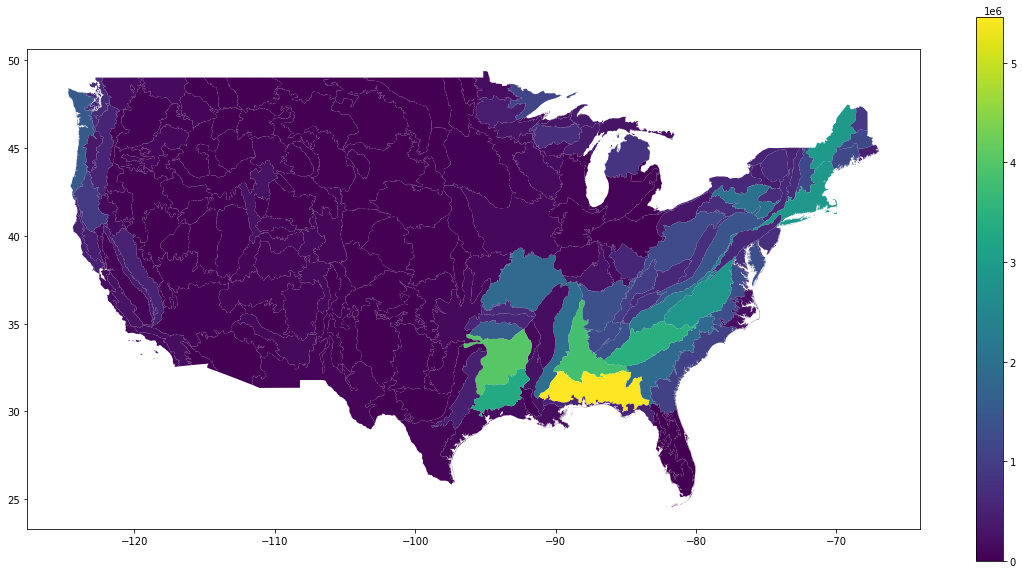

In [643]:
landcover.plot(column = "MIXED_FOREST_ACRES", figsize=(20,10), legend=True)

<AxesSubplot:>

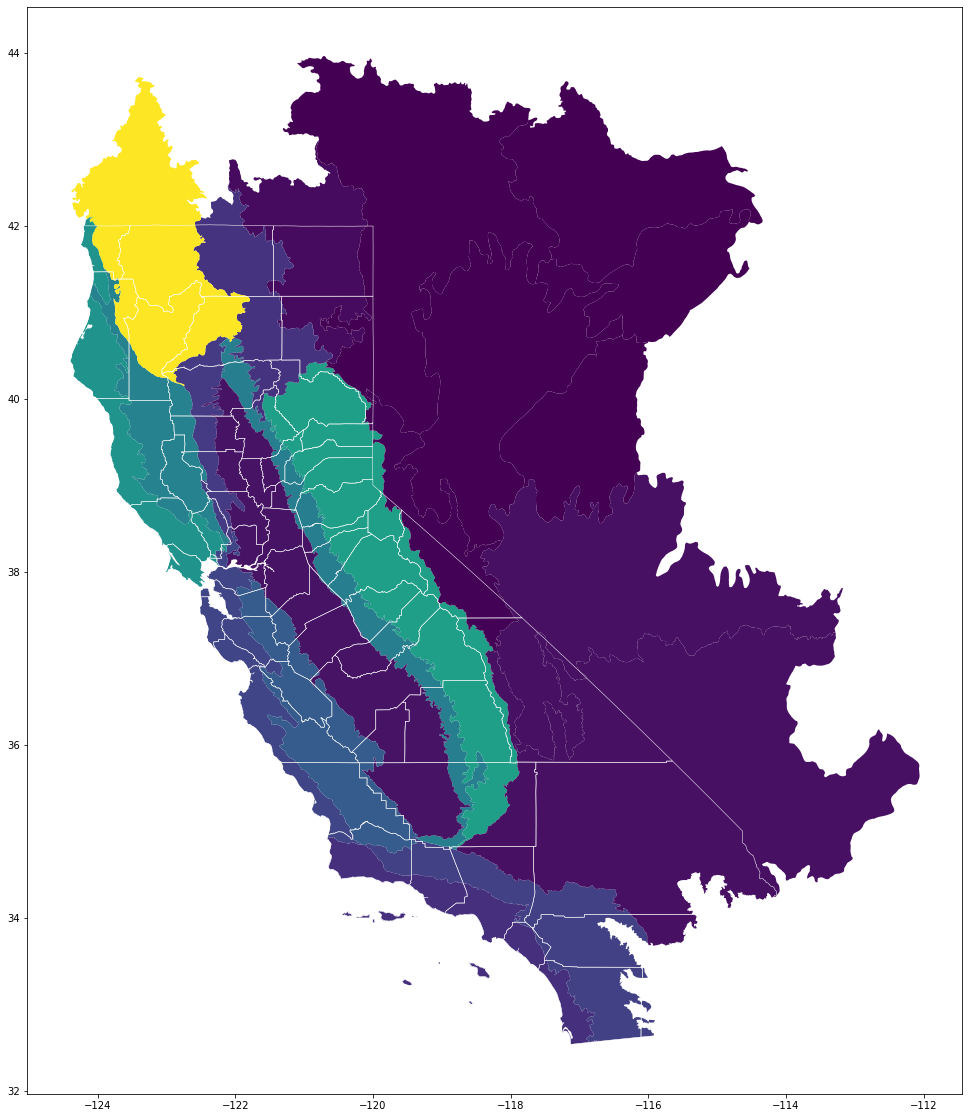

In [673]:
## Landcover data for California 
landcover_cal = landcover.cx[-125:-117, 32:41.8]



base = landcover_cal.plot(  column = "MIXED_FOREST_ACRES",
                            figsize=(20,20))

cal_counties2 = cal_counties.to_crs(landcover_cal.crs)

cal_counties2.plot(ax=base, 
                   facecolor="none",
                   edgecolor='white', 
                   linewidth=0.5)


****
## Landcover data overlapped with fires from the past 

<AxesSubplot:>

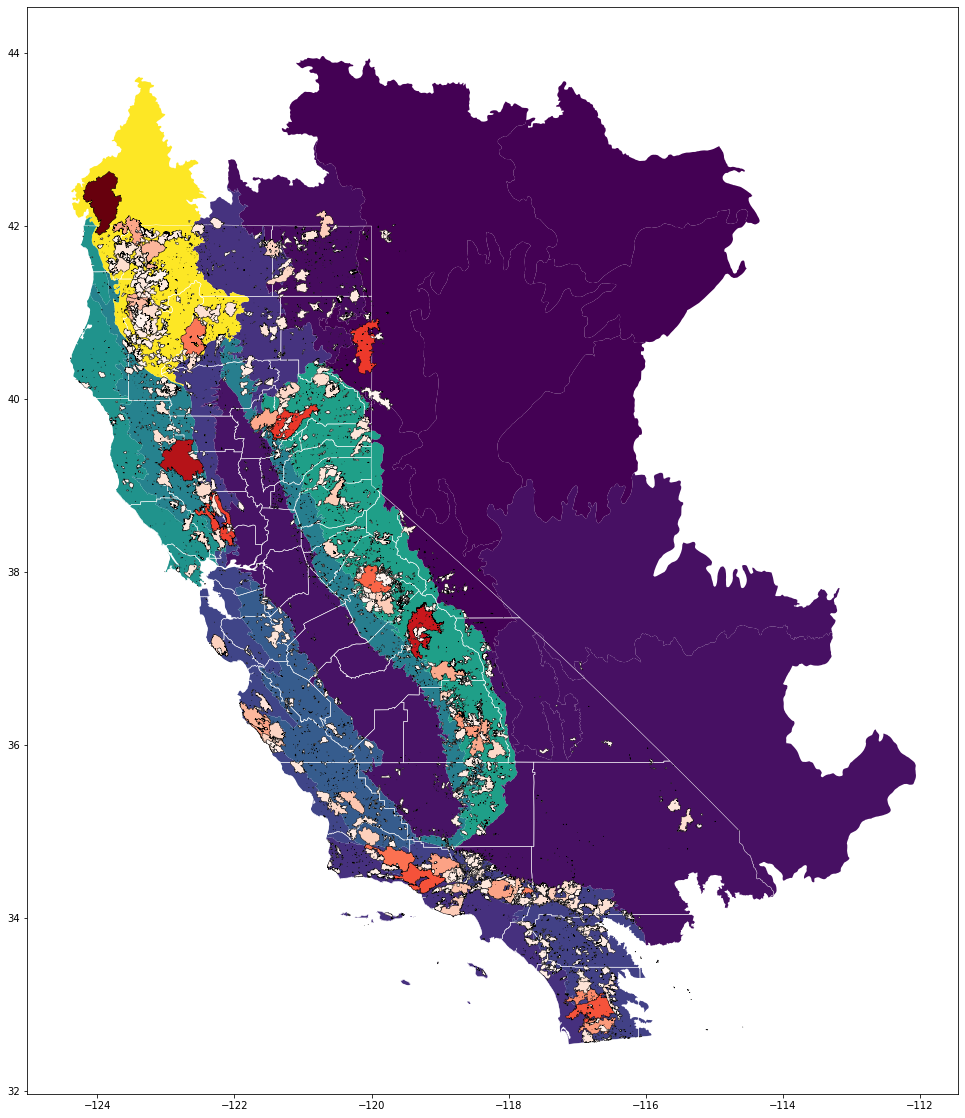

In [220]:
landcover_cal = landcover.cx[-125:-117, 32:41.8]



base = landcover_cal.plot(  column = "MIXED_FOREST_ACRES",
                            figsize=(20,20))


cal_counties2.plot(ax=base, 
                   facecolor="none",
                   edgecolor='white', 
                   linewidth=0.5)

fire_bound2 = fire_bound.to_crs(landcover_cal.crs)

fire_bound2.plot(  ax=base,
                   column="REPORT_AC",
                   cmap="Reds",
                   edgecolor = "black", 
                   linewidth = 0.4)

## US vegetation survey point data (visualization)

In [33]:
fiona.listlayers("../../Data/Geo/ds1020/ds1020.gdb")

['PhotoApp', 'ds1020', 'ds1020ex1_20200921']

In [674]:
# vegetation (plant cover) ================================================================================
veg = gpd.read_file("../../Data/Geo/ds1020/ds1020.gdb", layer="ds1020")
# print(list(veg.columns))
# print()
# print(list(veg['TreeCov'])[:1000])

/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

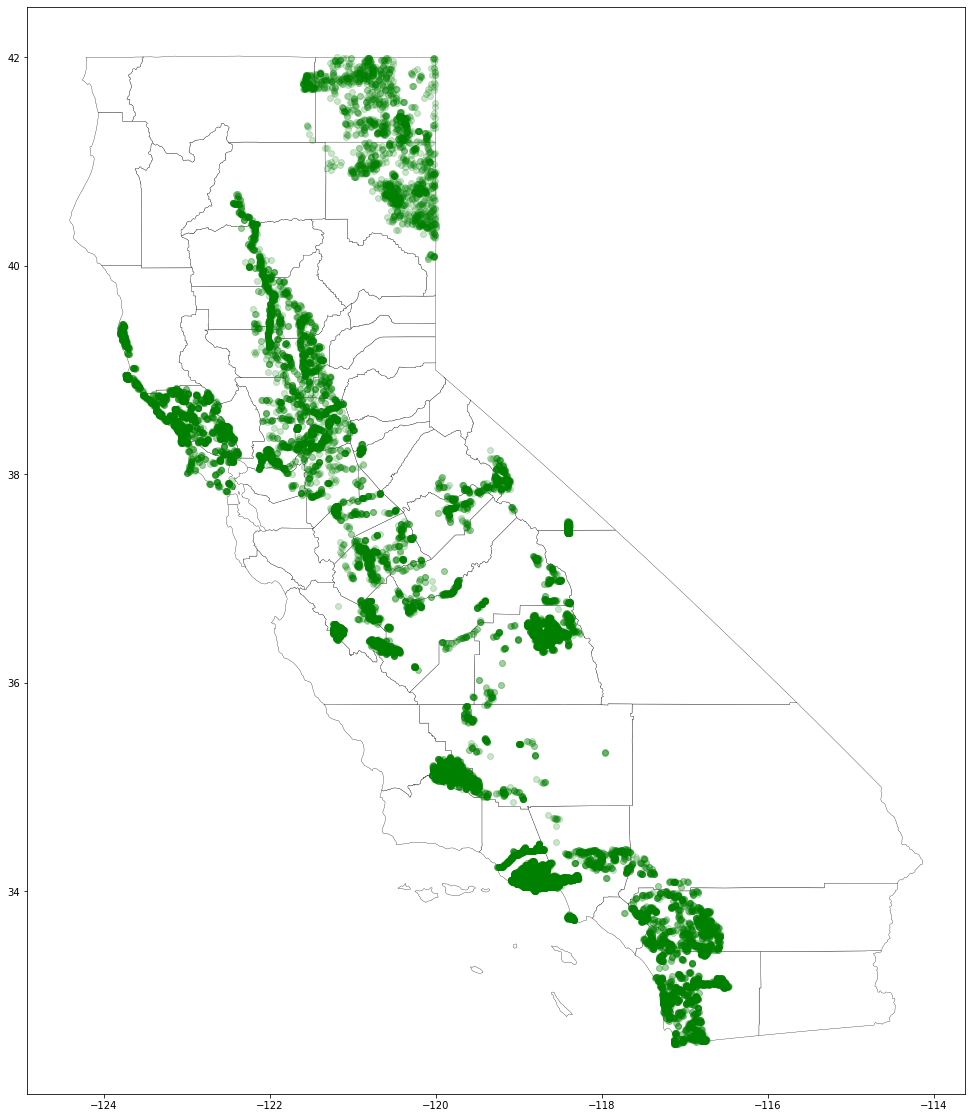

In [358]:
base = cal_counties.plot(color='white', 
                    edgecolor='black', 
                    linewidth=0.3,
                    figsize=(20,20))

veg = veg.to_crs(cal_counties.crs)


veg.plot(ax=base,
         column = "TotalVegCov", 
         color = "green",
         alpha = 0.2)



# Predict fires in Bay Area using the fire history data 

In [384]:
fire_bound.shape

(21241, 18)

In [385]:
bayarea.shape

(9, 10)

/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

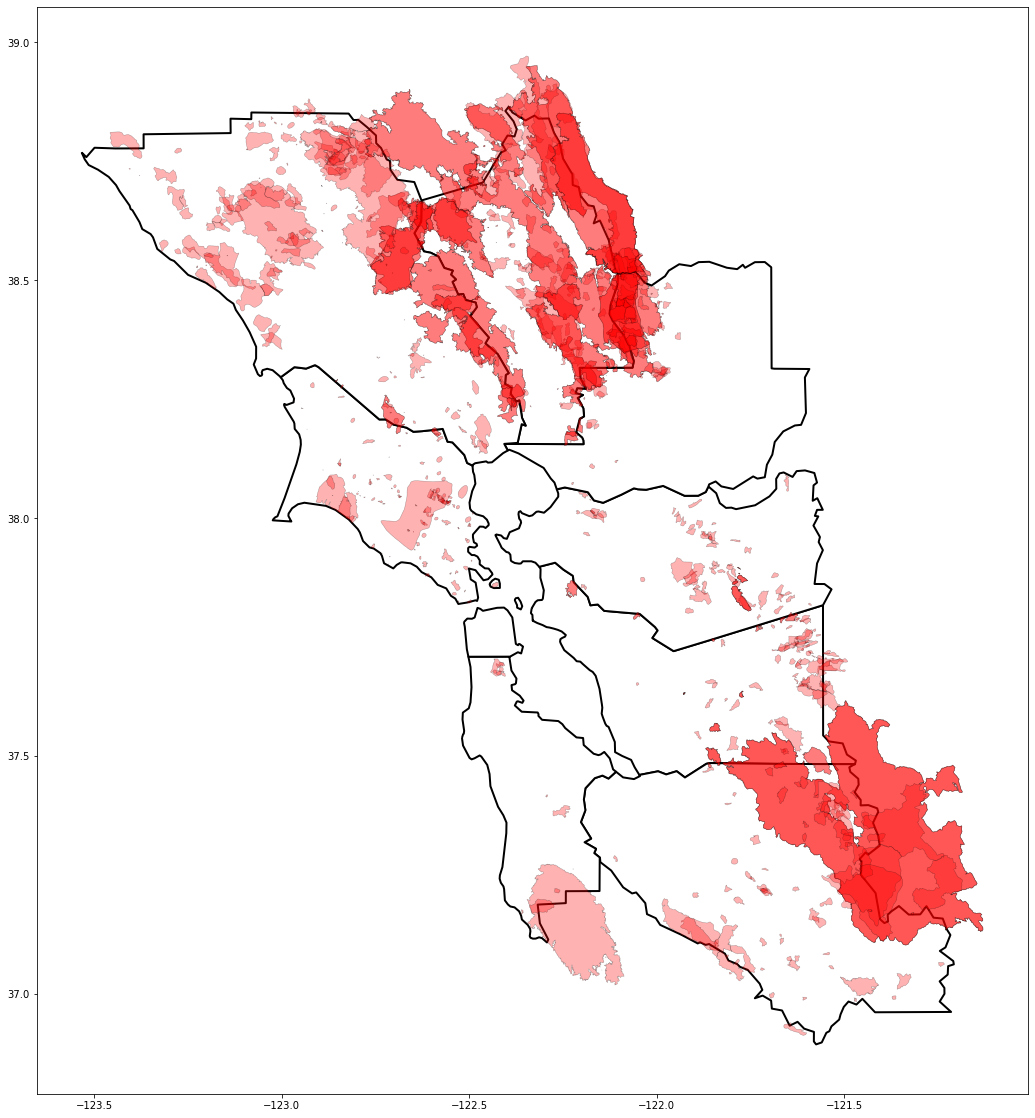

In [410]:
# only look at bayarea 
bayarea = cal_counties.loc[ (cal_counties.COUNTYFP == '075') | 
                            (cal_counties.COUNTYFP == '081') | 
                            (cal_counties.COUNTYFP == '085') | 
                            (cal_counties.COUNTYFP == '001') |
                            (cal_counties.COUNTYFP == '013') |
                            (cal_counties.COUNTYFP == '095') |
                            (cal_counties.COUNTYFP == '055') |
                            (cal_counties.COUNTYFP == '097') | 
                            (cal_counties.COUNTYFP == '041') ]

# sjoining bayarea dataframe and the fire bound dataframe
bayarea_fire_history = gpd.sjoin(fire_bound, bayarea, how="inner", op='intersects')


base = bayarea.plot(color='white', 
                    edgecolor='black', 
                    linewidth=2,
                    figsize=(20,20));

bayarea_fire_history = bayarea_fire_history.to_crs(bayarea.crs)

bayarea_fire_history.plot(ax=base,
                column="REPORT_AC",
                color="red",
                alpha = 0.3,
                edgecolor = "black", 
                linewidth = 0.5,
                legend=True)

![Bay Area Counties](../../Data/Geo/Bayarea.png)

In [399]:
bayarea_fire_history.shape

(747, 28)

In [400]:
bayarea_fire_history.head()

YEAR_ STATE AGENCY UNIT_ID              FIRE_NAME   INC_NUM  \
21    2020    CA    CDF     CZU  CZU LIGHTNING COMPLEX  00005205   
362   2020    CA    CDF     CZU                  BRUNO  00001332   
2881  1962    CA    CDF     CZU   HANNA PROP. (BUTANO)  00000000   
2884  1962    CA    CDF     CZU                   LEIB  00000000   
3763  1962    CA    CDF     CZU           LINCOLN HILL  00000000   

                     ALARM_DATE                  CONT_DATE  CAUSE COMMENTS  \
21    2020-08-16T00:00:00+00:00  2020-09-24T00:00:00+00:00    1.0     None   
362   2020-02-28T00:00:00+00:00  2020-02-28T00:00:00+00:00    7.0     None   
2881  1962-01-09T00:00:00+00:00                       None   14.0            
2884  1962-01-07T00:00:00+00:00                       None   14.0            
3763  1962-01-08T00:00:00+00:00                       None   14.0            

      ...  index_right  STATEFP  COUNTYFP  COUNTYNS        AFFGEOID  GEOID  \
21    ...         2955       06       081  00277305  0500000US06081  06081   
362   ...         2955       06       081  00277305  0500000US06081  06081   
2881  ...         2955       06       081  00277305  0500000US06081  06081   
2884  ...         2955       06       081  00277305  0500000US06081  06081   
3763  ...         2955       06       081  00277305  0500000US06081  06081   

           NAME LSAD       ALAND     AWATER  
21    San Mateo   06  1161960635  757110545  
362   San Mateo   06  1161960635  757110545  
2881  San Mateo   06  1161960635  757110545  
2884  San Mateo   06  1161960635  757110545  
3763  San Mateo   06  1161960635  757110545  

[5 rows x 28 columns]

In [401]:
bayarea = cal_counties.loc[ (cal_counties.COUNTYFP == '075') | 
                            (cal_counties.COUNTYFP == '081') | 
                            (cal_counties.COUNTYFP == '085') | 
                            (cal_counties.COUNTYFP == '001') |
                            (cal_counties.COUNTYFP == '013') |
                            (cal_counties.COUNTYFP == '095') |
                            (cal_counties.COUNTYFP == '055') |
                            (cal_counties.COUNTYFP == '097') | 
                            (cal_counties.COUNTYFP == '041') ]

bayarea

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID           NAME LSAD  \
1715      06      001  01675839  0500000US06001  06001        Alameda   06   
1723      06      013  01675903  0500000US06013  06013   Contra Costa   06   
1895      06      095  00277312  0500000US06095  06095         Solano   06   
1965      06      055  00277292  0500000US06055  06055           Napa   06   
1998      06      041  00277285  0500000US06041  06041          Marin   06   
2096      06      097  01657246  0500000US06097  06097         Sonoma   06   
2760      06      085  00277307  0500000US06085  06085    Santa Clara   06   
2955      06      081  00277305  0500000US06081  06081      San Mateo   06   
3004      06      075  00277302  0500000US06075  06075  San Francisco   06   

           ALAND     AWATER                                           geometry  
1715  1909598013  216923745  POLYGON ((-122.33371 37.80980, -122.32357 37.8...  
1723  1857233047  225282636  POLYGON ((-122.42976 37.96540, -122.41536 37.9...  
1895  2128327622  218699936  POLYGON ((-122.40679 38.15563, -122.19538 38.1...  
1965  1938114186  104300794  POLYGON ((-122.62829 38.62304, -122.62740 38.6...  
1998  1347976788  797029137  MULTIPOLYGON (((-122.44632 37.86105, -122.4385...  
2096  4081491107  497455304  POLYGON ((-123.53354 38.76841, -123.52096 38.7...  
2760  3343896477   33589866  POLYGON ((-122.19051 37.38525, -122.19454 37.4...  
2955  1161960635  757110545  POLYGON ((-122.51953 37.53730, -122.51659 37.5...  
3004   121375681  479216672  MULTIPOLYGON (((-122.33096 37.78603, -122.3291...

(155, 28)


/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

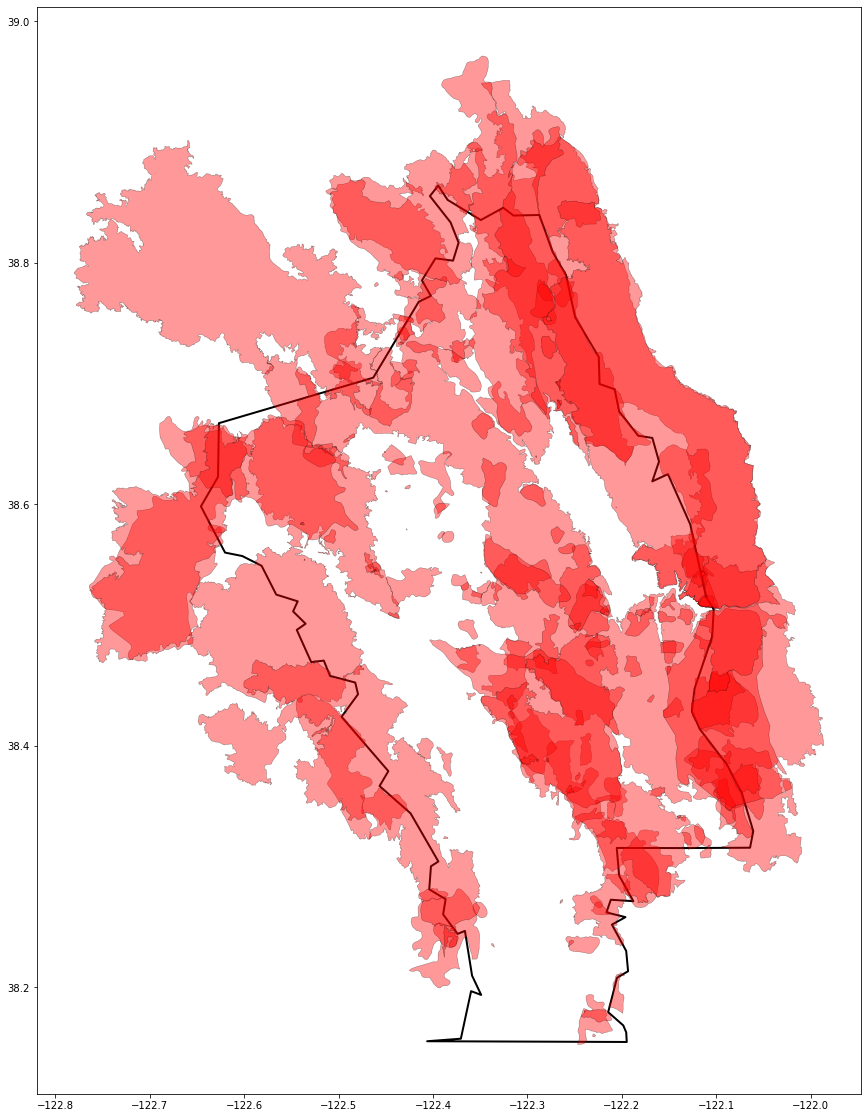

In [403]:
Napa = cal_counties.loc[ (cal_counties.COUNTYFP == '055') ]
Napa_fire_bound = fire_bound.to_crs(Napa.crs) 
Napa_fire = gpd.sjoin(Napa_fire_bound, Napa, how="inner", op='intersects')

base = Napa.plot(color='white', 
                edgecolor='black', 
                linewidth=2,
                figsize=(20,20));

Napa_fire = Napa_fire.to_crs(Napa.crs)

Napa_fire.plot(ax=base,
                column="REPORT_AC",
                color="red",
                alpha = 0.4,
                edgecolor = "black", 
                linewidth = 0.5,
                legend=True)

In [407]:
Napa_fire_2020 = Napa_fire.loc[Napa_fire["YEAR_"] == "2020"]
print(Napa_fire_2020.shape)
print(Napa_fire_2020.columns)
Napa_fire_2020

(12, 28)
Index(['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE', 'FIRE_NUM', 'Shape_Length',
       'Shape_Area', 'geometry', 'index_right', 'STATEFP', 'COUNTYFP',
       'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER'],
      dtype='object')


YEAR_ STATE AGENCY UNIT_ID   FIRE_NAME   INC_NUM  \
211  2020    CA    CDF     LNU        POPE  00017668   
219  2020    CA    CDF     LNU    KIRKLAND  00011819   
225  2020    CA    CDF     LNU   HENNESSEY  00013337   
226  2020    CA    CDF     LNU       GLASS  00015497   
230  2020    CA    CDF     LNU     SPANISH  00007631   
451  2020    CA    CDF     LNU  MONTICELLO  00014225   
452  2020    CA    CDF     LNU      LAWLEY  00010631   
453  2020    CA    CDF     LNU      HUBCAP  00016813   
458  2020    CA    CDF     LNU      MOBILE  00011766   
479  2020    CA    CDF     LNU      GAMBLE  00013354   
480  2020    CA    CDF     LNU         FOX  00011856   
484  2020    CA    CDF     LNU      NEWELL  00009981   

                    ALARM_DATE                  CONT_DATE  CAUSE  \
211  2020-10-23T00:00:00+00:00  2020-10-23T00:00:00+00:00   10.0   
219  2020-07-27T00:00:00+00:00  2020-07-27T00:00:00+00:00   11.0   
225  2020-08-17T00:00:00+00:00  2020-09-16T00:00:00+00:00    1.0   
226  2020-09-27T00:00:00+00:00  2020-10-20T00:00:00+00:00   14.0   
230  2020-05-24T00:00:00+00:00  2020-05-24T00:00:00+00:00    2.0   
451  2020-08-30T00:00:00+00:00  2020-08-30T00:00:00+00:00   14.0   
452  2020-07-08T00:00:00+00:00  2020-07-08T00:00:00+00:00    2.0   
453  2020-10-10T00:00:00+00:00  2020-10-10T00:00:00+00:00    2.0   
458  2020-07-26T00:00:00+00:00  2020-07-26T00:00:00+00:00    2.0   
479  2020-04-02T00:00:00+00:00  2020-04-02T00:00:00+00:00    5.0   
480  2020-07-27T00:00:00+00:00  2020-07-27T00:00:00+00:00    4.0   
484  2020-06-29T00:00:00+00:00  2020-06-29T00:00:00+00:00    7.0   

                                        COMMENTS  ...  index_right  STATEFP  \
211                              Marc Hottendorf  ...         1965       06   
219                                  Kole Oliver  ...         1965       06   
225            Part of the LNU LIGHTNING COMPLEX  ...         1965       06   
226                                   J. Baldwin  ...         1965       06   
230                            Brandon Bertolino  ...         1965       06   
451                                   Jake White  ...         1965       06   
452                                  Matt Frantz  ...         1965       06   
453                                 Matt Maxwell  ...         1965       06   
458                              Marc Hottendorf  ...         1965       06   
479  Jase Indrebro Part of LNU LIGHTNING COMPLEX  ...         1965       06   
480                                Jase Indrebro  ...         1965       06   
484                                  Zach Cartee  ...         1965       06   

     COUNTYFP  COUNTYNS        AFFGEOID  GEOID  NAME LSAD       ALAND  \
211       055  00277292  0500000US06055  06055  Napa   06  1938114186   
219       055  00277292  0500000US06055  06055  Napa   06  1938114186   
225       055  00277292  0500000US06055  06055  Napa   06  1938114186   
226       055  00277292  0500000US06055  06055  Napa   06  1938114186   
230       055  00277292  0500000US06055  06055  Napa   06  1938114186   
451       055  00277292  0500000US06055  06055  Napa   06  1938114186   
452       055  00277292  0500000US06055  06055  Napa   06  1938114186   
453       055  00277292  0500000US06055  06055  Napa   06  1938114186   
458       055  00277292  0500000US06055  06055  Napa   06  1938114186   
479       055  00277292  0500000US06055  06055  Napa   06  1938114186   
480       055  00277292  0500000US06055  06055  Napa   06  1938114186   
484       055  00277292  0500000US06055  06055  Napa   06  1938114186   

        AWATER  
211  104300794  
219  104300794  
225  104300794  
226  104300794  
230  104300794  
451  104300794  
452  104300794  
453  104300794  
458  104300794  
479  104300794  
480  104300794  
484  104300794  

[12 rows x 28 columns]

In [436]:
# Fires in 2020
bayarea = cal_counties.loc[ (cal_counties.COUNTYFP == '075') | 
                            (cal_counties.COUNTYFP == '081') | 
                            (cal_counties.COUNTYFP == '085') | 
                            (cal_counties.COUNTYFP == '001') |
                            (cal_counties.COUNTYFP == '013') |
                            (cal_counties.COUNTYFP == '095') |
                            (cal_counties.COUNTYFP == '055') |
                            (cal_counties.COUNTYFP == '097') | 
                            (cal_counties.COUNTYFP == '041') ]

# sjoining bayarea dataframe and the fire bound dataframe
fire_bound_2020 = fire_bound.loc[fire_bound["YEAR_"] == "2020"]
bayarea_fire_history_2020 = gpd.sjoin(fire_bound_2020, bayarea, how="inner", op='intersects')

In [428]:
fire_bound_last_5_years = fire_bound.loc[fire_bound["YEAR_"] > "2015"]

In [430]:
print(fire_bound_last_5_years.shape)
bayarea_fire_history_last5years = gpd.sjoin(fire_bound_last_5_years, bayarea, how="inner", op='intersects')

(2184, 18)


/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

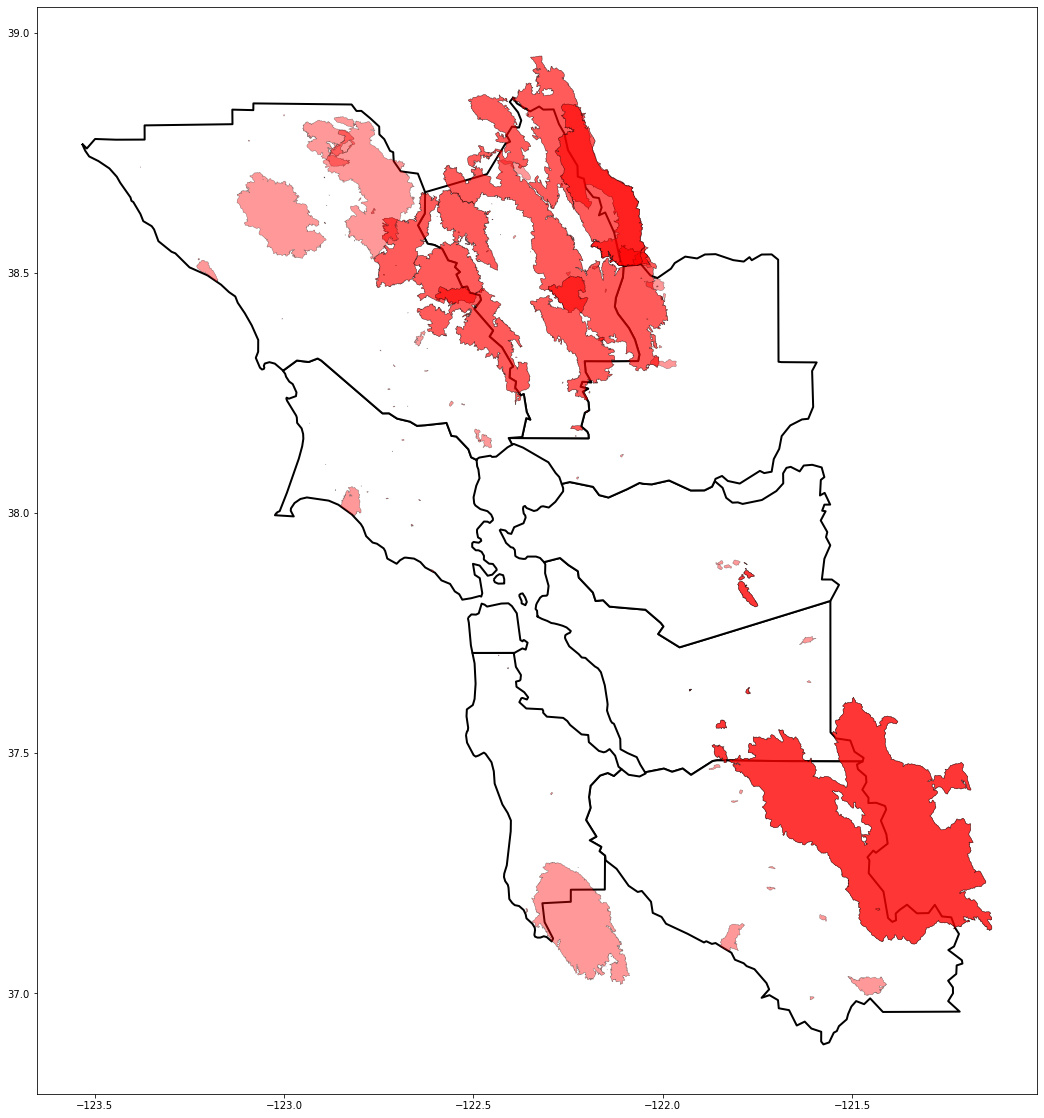

In [433]:
base = bayarea.plot(color='white', 
                    edgecolor='black', 
                    linewidth=2,
                    figsize=(20,20));

bayarea_fire_history_last5years = bayarea_fire_history_last5years.to_crs(bayarea.crs)

bayarea_fire_history_last5years.plot(ax=base,
                                    column="REPORT_AC",
                                    color="red",
                                    alpha = 0.4,
                                    edgecolor = "black", 
                                    linewidth = 0.5,
                                    legend=True)

![Bay Area Counties](../../Data/Geo/Bayarea.png)

In [413]:
bayarea

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID           NAME LSAD  \
1715      06      001  01675839  0500000US06001  06001        Alameda   06   
1723      06      013  01675903  0500000US06013  06013   Contra Costa   06   
1895      06      095  00277312  0500000US06095  06095         Solano   06   
1965      06      055  00277292  0500000US06055  06055           Napa   06   
1998      06      041  00277285  0500000US06041  06041          Marin   06   
2096      06      097  01657246  0500000US06097  06097         Sonoma   06   
2760      06      085  00277307  0500000US06085  06085    Santa Clara   06   
2955      06      081  00277305  0500000US06081  06081      San Mateo   06   
3004      06      075  00277302  0500000US06075  06075  San Francisco   06   

           ALAND     AWATER                                           geometry  
1715  1909598013  216923745  POLYGON ((-122.33371 37.80980, -122.32357 37.8...  
1723  1857233047  225282636  POLYGON ((-122.42976 37.96540, -122.41536 37.9...  
1895  2128327622  218699936  POLYGON ((-122.40679 38.15563, -122.19538 38.1...  
1965  1938114186  104300794  POLYGON ((-122.62829 38.62304, -122.62740 38.6...  
1998  1347976788  797029137  MULTIPOLYGON (((-122.44632 37.86105, -122.4385...  
2096  4081491107  497455304  POLYGON ((-123.53354 38.76841, -123.52096 38.7...  
2760  3343896477   33589866  POLYGON ((-122.19051 37.38525, -122.19454 37.4...  
2955  1161960635  757110545  POLYGON ((-122.51953 37.53730, -122.51659 37.5...  
3004   121375681  479216672  MULTIPOLYGON (((-122.33096 37.78603, -122.3291...

## Count the number of fires in each county for the past 5 years

{'San Mateo': 4, 'Contra Costa': 4, 'Alameda': 2, 'Santa Clara': 10, 'Napa': 31, 'Sonoma': 37, 'Solano': 19, 'Marin': 13}


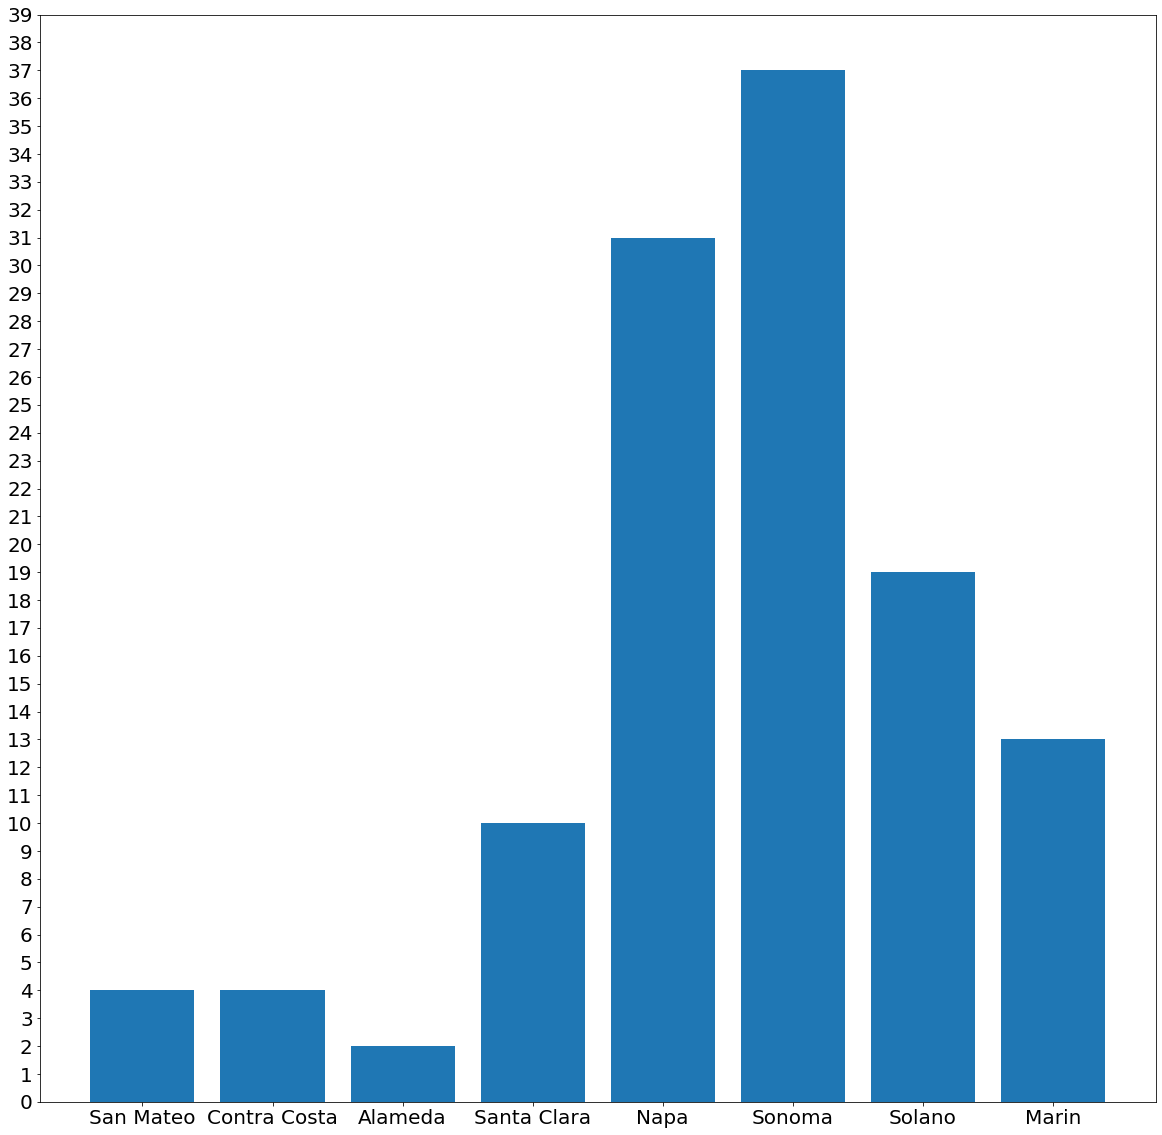

In [491]:
fires_count = {}

for i, row in bayarea_fire_history_last5years.iterrows():
    cur_count = fires_count.get(row["NAME"])
    if cur_count is None:
        fires_count[row["NAME"]] = 0
    else:
        fires_count[row["NAME"]] = cur_count + 1
   
print(fires_count)

plt.figure(figsize=(20, 20))
plt.bar(range(len(fires_count)), list(fires_count.values()), align='center')
plt.xticks(range(len(fires_count)), list(fires_count.keys()))
plt.yticks(range(40))
plt.rcParams["font.size"] = "20"
plt.show()

## Count the number of large fires (> 100 Acres) in each county for the past 5 years

{'San Mateo': 0, 'Contra Costa': 0, 'Alameda': 0, 'Santa Clara': 1, 'Napa': 6, 'Sonoma': 7, 'Solano': 5, 'Marin': 1}


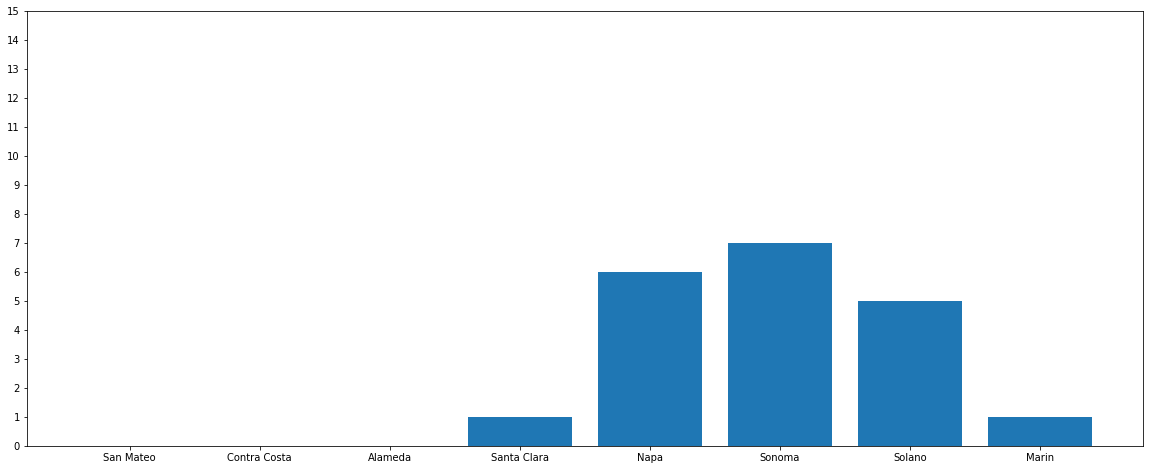

In [637]:
fires_count = {}

for i, row in bayarea_fire_history_last5years.iterrows():
    cur_count = fires_count.get(row["NAME"])
    if cur_count is None:
        fires_count[row["NAME"]] = 0
    else:
        if row["REPORT_AC"] > 100.0:
            fires_count[row["NAME"]] = cur_count + 1
   
print(fires_count)
plt.figure(figsize=(20, 8))
plt.bar(range(len(fires_count)), list(fires_count.values()), align='center')
plt.xticks(range(len(fires_count)), list(fires_count.keys()))
plt.yticks(range(16))
plt.show()

## Count the number of large fires (> 100 Acres) in each county in 2020

{'San Mateo': 0, 'Contra Costa': 0, 'Alameda': 0, 'Santa Clara': 0, 'Napa': 1, 'Sonoma': 1, 'Solano': 2, 'Marin': 1}


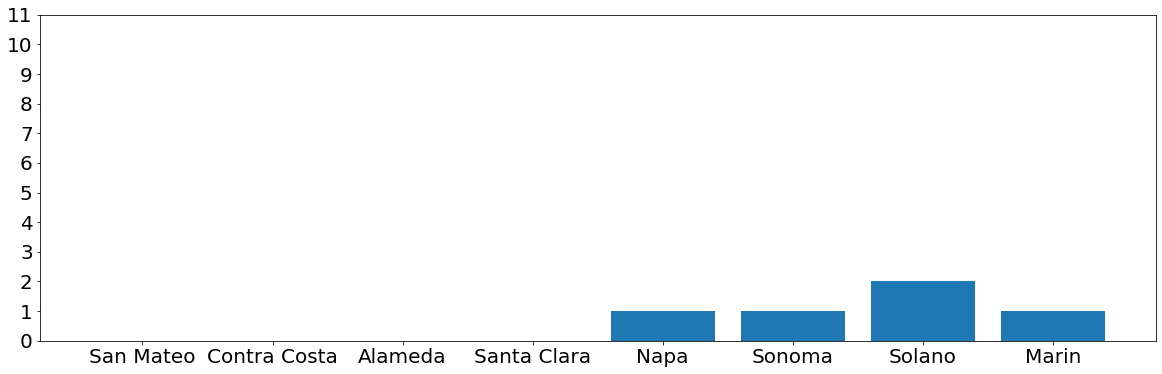

In [493]:
fires_count_2020 = {}

for i, row in bayarea_fire_history_2020.iterrows():
    cur_count = fires_count_2020.get(row["NAME"])
    if cur_count is None:
        fires_count_2020[row["NAME"]] = 0
    else:
        if row["REPORT_AC"] > 100.0:
            fires_count_2020[row["NAME"]] = cur_count + 1
   
print(fires_count_2020)

plt.figure(figsize=(20, 6))
plt.bar(range(len(fires_count_2020)), list(fires_count_2020.values()), align='center')
plt.xticks(range(len(fires_count_2020)), list(fires_count_2020.keys()))
plt.yticks(range(12))
plt.show()

## Making predictions on fire hotspot in the Bay Area
by selecting the overlapping regions based on hazard zones and regions that had fires in the past 

> First, get hazard zones in the Bay Area 

In [726]:
hazard_zones_in_bayarea = gpd.sjoin(hazard_zones2_2020, bayarea, how="inner", op='intersects')

> Get rid of columns that are not useful

In [723]:
hazard_zones_in_bayarea_geo = hazard_zones_in_bayarea["geometry"].to_frame()
hazard_zones_in_bayarea_geo

geometry
18    MULTIPOLYGON (((-121.41808 36.74411, -121.4194...
146   MULTIPOLYGON (((-121.69999 37.51257, -121.6995...
184   MULTIPOLYGON (((-121.60979 37.38751, -121.6088...
185   MULTIPOLYGON (((-121.65242 37.47825, -121.6524...
877   MULTIPOLYGON (((-121.69555 37.43844, -121.6960...
...                                                 ...
5095  MULTIPOLYGON (((-122.07624 38.51503, -122.0768...
5097  MULTIPOLYGON (((-122.05754 38.54099, -122.0575...
5098  MULTIPOLYGON (((-122.05754 38.54099, -122.0575...
5099  MULTIPOLYGON (((-122.05754 38.54099, -122.0575...
2032  MULTIPOLYGON (((-121.84215 37.88436, -121.8422...

[130 rows x 1 columns]

In [727]:
bayarea_fire_history_geo = bayarea_fire_history["geometry"].to_frame()
bayarea_fire_history_geo

geometry
21     MULTIPOLYGON (((-122.12814 37.02800, -122.1280...
362    MULTIPOLYGON (((-122.43429 37.70366, -122.4341...
2881   MULTIPOLYGON (((-122.27185 37.22118, -122.2711...
2884   MULTIPOLYGON (((-122.27648 37.37525, -122.2772...
3763   MULTIPOLYGON (((-122.31591 37.17035, -122.3167...
...                                                  ...
20556  MULTIPOLYGON (((-122.99861 37.99885, -122.9986...
20565  MULTIPOLYGON (((-122.88981 38.10103, -122.8897...
20973  MULTIPOLYGON (((-122.86369 38.04766, -122.8636...
21178  MULTIPOLYGON (((-122.64397 38.02767, -122.6439...
21307  MULTIPOLYGON (((-122.60583 37.87592, -122.6060...

[747 rows x 1 columns]

> Sjoining hazard zones and fire history data

/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

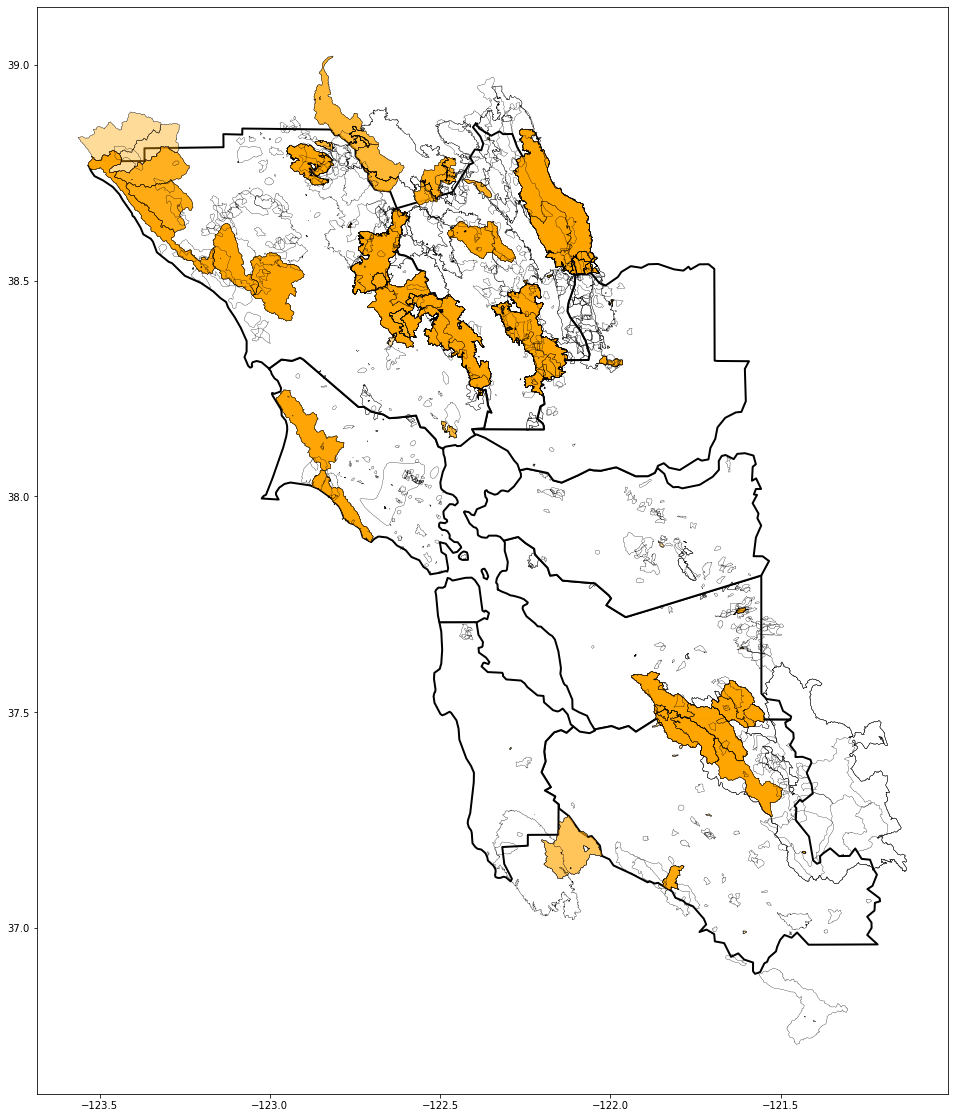

In [744]:
prediction = gpd.sjoin(hazard_zones_in_bayarea_geo, bayarea_fire_history_geo, how="inner", op='intersects')

base = bayarea.plot(color='white', 
                    edgecolor='black', 
                    linewidth=2,
                    figsize=(20,20));

prediction = prediction.to_crs(bayarea.crs)


prediction.plot(ax=base,
                column="REPORT_AC",
                color="orange",
                alpha = 0.4,
                edgecolor = "black", 
                linewidth = 0.3,
                legend=True)

bayarea_fire_history = bayarea_fire_history.to_crs(bayarea.crs)
bayarea_fire_history.plot(ax=base,
                         color="None",
                         edgecolor = "black", 
                         linewidth = 0.3)

hazard_zones_in_bayarea = hazard_zones_in_bayarea.to_crs(bayarea.crs)
hazard_zones_in_bayarea.plot(ax=base,
                         color="None",
                         edgecolor = "black", 
                         linewidth = 0.3)

# Results & Assumptions
Based on the results and the visualization of fires on map, there is expected to be some relationship between terrain (plant cover, geographic landscape, climate, etc) and wildfires. One assumption is that wind speed is the same. However, since it is difficult to acquire wind speed data, this part has been ignored. Also, it is also assumed wildfires caused mainly by nature (which is quite unlikely since many of the wildfires are actually caused by human activity, the analysis of which is beyond my ability since it is very difficult to consider human activity such as arson).  


  
# Discussion & Conclusion
It appears that fires are getting longer and harder to contain in recent years, likely due to global warming and temperature rising.
Through this research, I have learned that wildfires are actually hard to predict given the amount of randomness of the nature and the lack of extensive data there is. This also implies that it requires much professional knowledge in the field of meteorology and geology as well as statistics in order to be able to make predictions in a system so complicated. Lastly, these data have shown that fires are indeed getting worse from decade to decade, and global warming issue is a serious problem that may have contributed to this trend. I would definitely love to do more research about this area using more tools and more data in future. 

![Global Warming](../../Data/Geo/globalwarming.webp)
[Source](https://www.google.com.hk/url?sa=i&url=https%3A%2F%2Ftheconversation.com%2Fhow-to-win-the-climate-wars-talk-about-local-pollution-not-global-warming-82797&psig=AOvVaw2PQaHpivMokFFahnZ1lOvc&ust=1625155860355000&source=images&cd=vfe&ved=0CAsQjhxqFwoTCICLmsDfv_ECFQAAAAAdAAAAABAD)

***

# Reference:

1. https://www.ca.gov/agency/?item=california-department-of-forestry-and-fire-protection 

2. https://en.wikipedia.org/wiki/2019–20_Australian_bushfire_season 

3. https://frap.fire.ca.gov

4. https://www.arcgis.com/home/item.html?id=fc0ccb504be142b59eb16a7ef44669a3

5. https://www.fs.usda.gov/detail/r5/landmanagement/resourcemanagement/?cid=stelprdb5347192

6. https://data.fs.usda.gov/geodata/edw/datasets.php

7. https://data.cnra.ca.gov/dataset/4e2d81e7-ee01-4f91-b264-814efdea9c94
